In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Batsman

In [4]:
Batters=pd.read_csv(r"C:\Users\095bh\Downloads\Batters.csv")

We loaded the dataset but we require 2 more columns in the dataset to filter the players so iam adding 2 more columns which are `Boundary_percentage` and `Balls_faced/Innings`.

In [5]:
Batters['Boundary_percentage']=np.round((((Batters['Fours']*4)+(Batters['Sixes']*6))/Batters['Runs'])*100,2)

In [6]:
Batters['Balls_faced/Innings']=np.round(Batters['B_Faced']/Batters['Inns'])

In [7]:
Batters.drop(columns='Unnamed: 0',inplace=True)

In [8]:
Batters

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.03,2094,138.6,262,80,52.65,27.0
1,RG Sharma (IND),89,84,9,2438,32.50,1731,140.9,217,113,63.41,21.0
2,MJ Guptill (NZ),71,69,5,2182,34.10,1569,139.0,196,106,65.08,23.0
3,AJ Finch (AUS),66,66,9,2149,37.70,1395,154.0,216,97,67.29,21.0
4,PR Stirling (IRE),72,71,6,2047,31.48,1430,143.1,244,70,68.20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1881,S Zargar (Mex),1,0,0,0,0.00,0,0.0,0,0,NaN,NaN
1882,Zeeshan Khan (MLT),1,0,0,0,0.00,0,0.0,0,0,NaN,NaN
1883,Zeshan Arif (Aut),3,0,0,0,0.00,0,0.0,0,0,NaN,NaN
1884,Ziaur Rahman (AFG),1,0,0,0,0.00,0,0.0,0,0,NaN,NaN


In [25]:
Batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               1886 non-null   object 
 1   Matches              1886 non-null   int64  
 2   Inns                 1886 non-null   int64  
 3   Not_outs             1886 non-null   int64  
 4   Runs                 1886 non-null   int64  
 5   Ave                  1886 non-null   float64
 6   B_Faced              1886 non-null   int64  
 7   SR                   1886 non-null   float64
 8   Fours                1886 non-null   int64  
 9   Sixes                1886 non-null   int64  
 10  Boundary_percentage  1657 non-null   float64
 11  Balls_faced/Innings  1738 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 176.9+ KB


In [26]:
Batters.isna().sum()

Player                   0
Matches                  0
Inns                     0
Not_outs                 0
Runs                     0
Ave                      0
B_Faced                  0
SR                       0
Fours                    0
Sixes                    0
Boundary_percentage    229
Balls_faced/Innings    148
dtype: int64

As we can see we have some `nan` values in Boundary_percentage and Balls_faced/Innings so we are going to remove the `nan` records we it's easy for filteration

### Dataset exploration

In [27]:
Batters.head()

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.03,2094,138.6,262,80,52.65,27.0
1,RG Sharma (IND),89,84,9,2438,32.50,1731,140.9,217,113,63.41,21.0
2,MJ Guptill (NZ),71,69,5,2182,34.10,1569,139.0,196,106,65.08,23.0
3,AJ Finch (AUS),66,66,9,2149,37.70,1395,154.0,216,97,67.29,21.0
4,PR Stirling (IRE),72,71,6,2047,31.48,1430,143.1,244,70,68.20,20.0


In [28]:
Batters.tail()

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
1881,S Zargar (Mex),1,0,0,0,0.0,0,0.0,0,0,NaN,NaN
1882,Zeeshan Khan (MLT),1,0,0,0,0.0,0,0.0,0,0,NaN,NaN
1883,Zeshan Arif (Aut),3,0,0,0,0.0,0,0.0,0,0,NaN,NaN
1884,Ziaur Rahman (AFG),1,0,0,0,0.0,0,0.0,0,0,NaN,NaN
1885,No records available to match this query,0,0,0,0,0.0,0,0.0,0,0,NaN,NaN


In [29]:
Batters.shape

(1886, 12)

As we see there are some nan values in the dataset which are not needed for filtering so iam going to clean the data and also iam replacing 0 with nan so we can remove some records from the dataset

### Data cleaning

In [9]:
Batters.replace(0,np.nan,inplace=True)

In [10]:
Batters

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83.0,78.0,20.0,2902.0,50.03,2094.0,138.6,262.0,80.0,52.65,27.0
1,RG Sharma (IND),89.0,84.0,9.0,2438.0,32.50,1731.0,140.9,217.0,113.0,63.41,21.0
2,MJ Guptill (NZ),71.0,69.0,5.0,2182.0,34.10,1569.0,139.0,196.0,106.0,65.08,23.0
3,AJ Finch (AUS),66.0,66.0,9.0,2149.0,37.70,1395.0,154.0,216.0,97.0,67.29,21.0
4,PR Stirling (IRE),72.0,71.0,6.0,2047.0,31.48,1430.0,143.1,244.0,70.0,68.20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1881,S Zargar (Mex),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,Zeeshan Khan (MLT),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,Zeshan Arif (Aut),3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,Ziaur Rahman (AFG),1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Batters.dropna(inplace=True)

In [12]:
Batters

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83.0,78.0,20.0,2902.0,50.03,2094.0,138.60,262.0,80.0,52.65,27.0
1,RG Sharma (IND),89.0,84.0,9.0,2438.0,32.50,1731.0,140.90,217.0,113.0,63.41,21.0
2,MJ Guptill (NZ),71.0,69.0,5.0,2182.0,34.10,1569.0,139.00,196.0,106.0,65.08,23.0
3,AJ Finch (AUS),66.0,66.0,9.0,2149.0,37.70,1395.0,154.00,216.0,97.0,67.29,21.0
4,PR Stirling (IRE),72.0,71.0,6.0,2047.0,31.48,1430.0,143.10,244.0,70.0,68.20,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,L Shafeeg (MDV),6.0,3.0,1.0,19.0,9.50,17.0,111.75,2.0,1.0,73.68,6.0
1114,KOK Williams (WI),26.0,7.0,4.0,19.0,6.33,17.0,111.75,1.0,1.0,52.63,2.0
1131,SA Abbott (AUS),7.0,2.0,1.0,17.0,17.00,16.0,106.25,1.0,1.0,58.82,8.0
1137,A Bohara (NEP),20.0,7.0,3.0,17.0,4.25,19.0,89.50,1.0,1.0,58.82,3.0


After cleaning the data we have 617 rows and 12 columns which we only consider for the filteration

In [34]:
Batters.duplicated().sum()

0

As we see,we don't have duplicates in the data

In [13]:
Batters=Batters.astype({'Matches':np.int16,'Inns':np.int16,'Not_outs':np.int16,'Runs':np.int16,'Ave':np.float16,'B_Faced':np.int16,'SR':np.float16,'Fours':np.int16,'Sixes':np.int16,'Boundary_percentage':np.float16,'Balls_faced/Innings':np.float16})

In [14]:
Batters

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.625,262,80,52.65625,27.0
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
2,MJ Guptill (NZ),71,69,5,2182,34.093750,1569,139.000,196,106,65.06250,23.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.000,216,97,67.31250,21.0
4,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.125,244,70,68.18750,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.750,2,1,73.68750,6.0
1114,KOK Williams (WI),26,7,4,19,6.328125,17,111.750,1,1,52.62500,2.0
1131,SA Abbott (AUS),7,2,1,17,17.000000,16,106.250,1,1,58.81250,8.0
1137,A Bohara (NEP),20,7,3,17,4.250000,19,89.500,1,1,58.81250,3.0


We have changed the data types of the columns as per their values

In [15]:
Batters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               617 non-null    object 
 1   Matches              617 non-null    int16  
 2   Inns                 617 non-null    int16  
 3   Not_outs             617 non-null    int16  
 4   Runs                 617 non-null    int16  
 5   Ave                  617 non-null    float16
 6   B_Faced              617 non-null    int16  
 7   SR                   617 non-null    float16
 8   Fours                617 non-null    int16  
 9   Sixes                617 non-null    int16  
 10  Boundary_percentage  617 non-null    float16
 11  Balls_faced/Innings  617 non-null    float16
dtypes: float16(4), int16(7), object(1)
memory usage: 22.9+ KB


The dataset contains 1 (`object`),7 integer (`int16`) and 4 real float (`float16`) features.

### Attributing information

In [18]:
Batters.columns

Index(['Player', 'Matches', 'Inns', 'Not_outs', 'Runs', 'Ave', 'B_Faced', 'SR',
       'Fours', 'Sixes', 'Boundary_percentage', 'Balls_faced/Innings'],
      dtype='object')

1. `Player`- Player name (Categorical)
2. `Matches`- No.of matches he played (Numerical)
3. `Inns` - No.of matches he contributed with the bat (Numerical)
4. `Not_outs` - In how many matches he remained not out (Numerical)
5. `Runs`- Runs he scored in that decade (Numerical)
6. `Ave`- Batting average (Numerical)
7. `B_Faced`- Total balls he faced (Numerical)
8. `SR`- Strike rate of the batsman (Numerical)
9. `Fours`- Fours in which the player hit (Numerical)
10. `Sixes`- Sixes in which the player hit (Numerical)
11. `Boundary_percentage`- Percentage of boundaries of the batsman in his runs (Numerical)
12. `Balls_faced/Innings`- Average balls the player faced in an innings (Numerical)

### Sorting

In [45]:
Batters.sort_values(by='Runs',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.625,262,80,52.65625,27.0
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
2,MJ Guptill (NZ),71,69,5,2182,34.093750,1569,139.000,196,106,65.06250,23.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.000,216,97,67.31250,21.0
4,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.125,244,70,68.18750,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1111,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.750,2,1,73.68750,6.0
1114,KOK Williams (WI),26,7,4,19,6.328125,17,111.750,1,1,52.62500,2.0
1131,SA Abbott (AUS),7,2,1,17,17.000000,16,106.250,1,1,58.81250,8.0
1137,A Bohara (NEP),20,7,3,17,4.250000,19,89.500,1,1,58.81250,3.0


The sorting result shows that the maximum `runs` scored by any batsman in that decade was 2902 with an average of 50

In [46]:
Batters.sort_values(by='SR',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
848,Khalid Ahmadi (Belg),4,3,2,39,39.000000,14,278.5000,4,3,87.187500,5.0
659,Mirza Ahsan (Aut),4,4,3,66,66.000000,26,253.8750,4,7,87.875000,6.0
1014,PM Nevill (AUS),9,5,4,25,25.000000,11,227.2500,1,2,64.000000,2.0
601,SC Kuggeleijn (NZ),16,8,4,79,19.750000,37,213.5000,5,7,78.500000,5.0
306,Faisal Khan (KSA),7,7,1,206,34.343750,97,212.3750,22,14,83.500000,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
799,S Badree (WI/World),52,16,10,43,7.160156,65,66.1250,1,1,23.265625,4.0
841,F Stoman (PORT),4,4,1,40,13.328125,61,65.5625,1,1,25.000000,15.0
683,NM Odhiambo (KENYA),15,8,2,61,10.156250,94,64.8750,4,1,36.062500,12.0
784,B Ivanov (BUL),8,4,2,45,22.500000,71,63.3750,3,1,40.000000,18.0


The maximum `strike rate` of any batsman in the dataset is 278.5

In [60]:
Batters.sort_values(by='Not_outs',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
36,MS Dhoni (IND),73,61,35,1176,45.218750,889,132.250,90,39,50.50000,15.0
10,Shoaib Malik (ICC/PAK),84,75,25,1699,33.968750,1321,128.625,139,48,49.68750,18.0
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.625,262,80,52.65625,27.0
52,Najibullah Zadran (AFG),60,51,20,976,31.484375,694,140.625,63,52,57.78125,14.0
41,NLTC Perera (ICC/SL/World),74,66,19,1127,23.968750,734,153.500,84,59,61.21875,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
364,RG Aga (KENYA),16,14,1,162,12.460938,145,111.750,13,3,43.21875,10.0
655,AJ Michael (Samoa),4,4,1,67,22.328125,69,97.125,5,2,47.75000,17.0
662,V Saini (ROM),4,3,1,65,32.500000,40,162.500,1,4,43.09375,13.0
663,Abdul Waheed (KSA),3,3,1,64,32.000000,40,160.000,11,2,87.50000,13.0


The sorting result shows that any batsman remained not out mostly in 35 innings

In [74]:
Batters.sort_values(by='Matches',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
10,Shoaib Malik (ICC/PAK),84,75,25,1699,33.968750,1321,128.625,139,48,49.68750,18.0
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.625,262,80,52.65625,27.0
6,EJG Morgan (ENG),83,80,13,1862,27.796875,1342,138.750,131,100,60.37500,17.0
18,KJ O'Brien (IRE),79,74,7,1543,23.015625,1107,139.375,128,72,61.18750,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
488,LA Dunbar (SRB),2,2,1,104,104.000000,62,167.750,5,10,76.93750,31.0
1038,C Floyd (NED),2,2,1,23,23.000000,23,100.000,2,1,60.87500,12.0
961,VP Thamotharam (MLT),2,2,1,29,29.000000,18,161.125,4,1,75.87500,9.0
996,CT Mumba (ZIM),2,2,1,26,26.000000,17,153.000,3,1,69.25000,8.0


Highest number of matches played by any player is 89 in that decade

In [75]:
Batters.sort_values(by='Inns',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.8750,217,113,63.40625,21.0
6,EJG Morgan (ENG),83,80,13,1862,27.796875,1342,138.7500,131,100,60.37500,17.0
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0
10,Shoaib Malik (ICC/PAK),84,75,25,1699,33.968750,1321,128.6250,139,48,49.68750,18.0
5,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
819,SSM Stanislaus (MLT),3,2,1,42,42.000000,33,127.2500,1,2,38.09375,16.0
961,VP Thamotharam (MLT),2,2,1,29,29.000000,18,161.1250,4,1,75.87500,9.0
830,K Pala (PNG),2,2,1,41,41.000000,30,136.6250,4,2,68.31250,15.0
939,AS Mehmi (GRC),3,2,1,31,31.000000,29,106.8750,2,1,45.15625,14.0


Sorting result shows that any player who contributed with the bat mostly is in 84 innings

In [61]:
Batters.sort_values(by='Balls_faced/Innings',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
379,AN Kervezee (NED),4,4,1,154,51.343750,135,114.0625,5,4,28.562500,34.0
547,A Ferguson (Arg),5,3,1,88,44.000000,100,88.0000,5,1,29.546875,33.0
558,AR Gandhi (KENYA),3,3,1,86,43.000000,98,87.7500,5,1,30.234375,33.0
424,Najjam Shahzad (PORT),4,3,2,126,126.000000,97,129.8750,4,10,60.312500,32.0
410,Yusuf Ebrahim (PAN),3,3,1,137,68.500000,97,141.2500,14,5,62.781250,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,Washington Sundar (IND),26,9,3,40,6.660156,27,148.1250,3,3,75.000000,3.0
1082,M Morkel (SA/World),27,6,4,20,10.000000,13,153.8750,3,1,90.000000,2.0
1114,KOK Williams (WI),26,7,4,19,6.328125,17,111.7500,1,1,52.625000,2.0
647,Dawlat Zadran (AFG),34,17,8,68,7.550781,42,161.8750,4,6,76.500000,2.0


The sorting result shows that on average maximum `balls_faced/Innings` by any batter is 34.

In [76]:
Batters.sort_values(by='Fours',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0
4,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.8750,217,113,63.40625,21.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.0000,216,97,67.31250,21.0
7,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.00000,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
942,YK Pathan (IND),4,3,1,31,15.500000,26,119.2500,1,2,51.62500,9.0
951,DLS van Bunge (NED),4,3,2,30,30.000000,28,107.1250,1,2,53.34375,9.0
962,Ahsan Malik (NED),31,8,5,28,9.328125,30,93.3125,1,1,35.71875,4.0
968,H Osinde (CAN),5,4,1,28,9.328125,26,107.6875,1,2,57.12500,6.0


Sorting result shows that the maximum `fours` scored by any batsman is 262

In [77]:
Batters.sort_values(by='Sixes',ascending=False)

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
8,C Munro (NZ),65,62,7,1724,31.343750,1102,156.500,132,107,67.87500,18.0
2,MJ Guptill (NZ),71,69,5,2182,34.093750,1569,139.000,196,106,65.06250,23.0
6,EJG Morgan (ENG),83,80,13,1862,27.796875,1342,138.750,131,100,60.37500,17.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.000,216,97,67.31250,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
610,DR Hooper (GUE),9,8,3,76,15.203125,91,83.500,3,1,23.68750,11.0
754,JN Frylinck (NAM),14,7,4,49,16.328125,47,104.250,2,1,28.56250,7.0
747,Junaid Aziz (BHR),4,3,1,51,25.500000,43,118.625,6,1,58.81250,14.0
746,TGJ Gruijters (NED),8,5,3,51,25.500000,47,108.500,3,1,35.28125,9.0


Sorting result shows that the maximum `sixes` scored by any batsman is 113

# Bowlers 

In [60]:
Bowlers=pd.read_csv(r"C:\Users\095bh\Downloads\Bowlers.csv")

In [61]:
Bowlers

,Unnamed: 0,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,0,Rashid Khan (AFG/ICC),48,48,183.0,89,12.62,6.14,12.3
1,1,Shakib Al Hasan (BAN),62,61,228.5,75,20.88,6.84,18.3
2,2,SL Malinga (SL),55,54,201.5,72,20.80,7.41,16.8
3,3,CJ Jordan (ENG),55,54,192.0,66,25.31,8.70,17.4
4,4,TG Southee (NZ),56,54,201.0,65,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...,...
1245,1245,M Simmons (BER),2,1,2.1,0,0.00,0.00,0.0
1246,1246,H Singh (GER),9,1,1.0,0,0.00,0.00,0.0
1247,1247,DR Smith (WI),25,5,6.2,0,0.00,0.00,0.0
1248,1248,RAJ Smith (SCOT),2,2,6.5,0,0.00,0.00,0.0


In [62]:
Bowlers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1250 non-null   int64  
 1   Player      1250 non-null   object 
 2   Matches     1250 non-null   int64  
 3   Inns        1250 non-null   int64  
 4   Overs       1250 non-null   float64
 5   Wkts        1250 non-null   int64  
 6   Ave         1250 non-null   float64
 7   Eco         1250 non-null   float64
 8   SR          1250 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 88.0+ KB


## Data Cleaning

In [63]:
Bowlers.drop(columns='Unnamed: 0')

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72,20.80,7.41,16.8
3,CJ Jordan (ENG),55,54,192.0,66,25.31,8.70,17.4
4,TG Southee (NZ),56,54,201.0,65,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...
1245,M Simmons (BER),2,1,2.1,0,0.00,0.00,0.0
1246,H Singh (GER),9,1,1.0,0,0.00,0.00,0.0
1247,DR Smith (WI),25,5,6.2,0,0.00,0.00,0.0
1248,RAJ Smith (SCOT),2,2,6.5,0,0.00,0.00,0.0


The unnamed column was dropped from the dataset

As we can see,in the dataset we have some records with zeros(0s) but we don't need those records for the filteration so iam going to replace 0s with nan values and i will remove them from the dataset

In [64]:
Bowlers.replace(0,np.nan,inplace=True)

In [65]:
Bowlers.drop(columns='Unnamed: 0',inplace=True)

In [66]:
Bowlers

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89.0,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
3,CJ Jordan (ENG),55,54,192.0,66.0,25.31,8.70,17.4
4,TG Southee (NZ),56,54,201.0,65.0,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...
1245,M Simmons (BER),2,1,2.1,NaN,NaN,NaN,NaN
1246,H Singh (GER),9,1,1.0,NaN,NaN,NaN,NaN
1247,DR Smith (WI),25,5,6.2,NaN,NaN,NaN,NaN
1248,RAJ Smith (SCOT),2,2,6.5,NaN,NaN,NaN,NaN


As we can see the above dataset 0s are replaced with nan values and iam going to remove nan valued records from the dataset

In [67]:
Bowlers.dropna(inplace=True)

In [68]:
Bowlers

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89.0,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
3,CJ Jordan (ENG),55,54,192.0,66.0,25.31,8.70,17.4
4,TG Southee (NZ),56,54,201.0,65.0,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...
1067,Yusuf Ebrahim (PAN),3,3,7.0,1.0,44.00,6.28,42.0
1068,Zaheer Maqsood (UAE),3,3,9.0,1.0,80.00,8.88,54.0
1069,Zamir Khan (AFG),1,1,4.0,1.0,26.00,6.50,24.0
1070,Zawar Farid (UAE),4,2,4.1,1.0,35.00,8.40,25.0


`NaN` valued records are removed from the dataset

## Attributing Information

In [190]:
Bowlers.columns

Index(['Player', 'Matches', 'Inns', 'Overs', 'Wkts', 'Ave', 'Eco', 'SR'], dtype='object')

1. `Player`- Player name (Categorical)
2. `Matches`- No.of matches he played (Numerical)
3. `Inns` - No.of matches he contributed with the ball (Numerical)
4. `Overs` - Total overs he bowled
5. `Wkts` - Total wickets he took
6. `Ave` - Bowling average of the bowler in which for every number of runs he took a wicket
7. `Eco` - Economy rate of the bowler
8. `SR` - Strike rate of the bowler in which for every number of balls he took a wicket

## Data Exploration

In [128]:
Bowlers.head()

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89.0,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
3,CJ Jordan (ENG),55,54,192.0,66.0,25.31,8.70,17.4
4,TG Southee (NZ),56,54,201.0,65.0,25.95,8.39,18.5


In [129]:
Bowlers.tail()

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
1067,Yusuf Ebrahim (PAN),3,3,7.0,1.0,44.0,6.28,42.0
1068,Zaheer Maqsood (UAE),3,3,9.0,1.0,80.0,8.88,54.0
1069,Zamir Khan (AFG),1,1,4.0,1.0,26.0,6.50,24.0
1070,Zawar Farid (UAE),4,2,4.1,1.0,35.0,8.40,25.0
1071,Zohaib Sarwar (PORT),4,4,7.0,1.0,51.0,7.28,42.0


In [130]:
Bowlers.duplicated().sum()

0

As we can see there are no duplicate records in the dataset

In [165]:
Bowlers.isna().sum()

Player     0
Matches    0
Inns       0
Overs      0
Wkts       0
Ave        0
Eco        0
SR         0
dtype: int64

As we see there are no `NaN` values in the above dataset

## Sorting bowlers dataset

In [132]:
Bowlers.sort_values(by='Matches',ascending=False)

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
222,Shoaib Malik (ICC/PAK),84,30,50.0,14.0,26.64,7.46,21.4
632,V Kohli (IND),83,12,24.2,4.0,49.50,8.13,36.5
19,KJ O'Brien (IRE),79,38,115.0,50.0,17.40,7.56,13.8
35,Mohammad Hafeez (PAK),78,51,139.1,42.0,20.34,6.14,19.8
86,Mahmudullah (BAN),76,49,104.2,29.0,26.31,7.31,21.5
...,...,...,...,...,...,...,...,...
690,S Bantzas (GRC),1,1,3.0,3.0,4.00,4.00,6.0
933,RD Chahar (IND),1,1,3.0,1.0,27.00,9.00,18.0
957,BW Hilfenhaus (AUS),1,1,3.0,1.0,18.00,6.00,18.0
929,SG Borthwick (ENG),1,1,4.0,1.0,15.00,3.75,24.0


The sorting result shows that any bowler played most matches in that decade was 84 

In [133]:
Bowlers.sort_values(by='Inns',ascending=False)

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
9,Mohammad Nabi (AFG),70,69,232.4,58.0,28.67,7.14,24.0
5,GH Dockrell (IRE),70,65,203.5,64.0,23.31,7.31,19.1
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
27,NLTC Perera (ICC/SL/World),74,60,164.4,46.0,34.20,9.55,21.4
29,Shahid Afridi (ICC/PAK),57,55,202.2,45.0,31.56,7.01,27.0
...,...,...,...,...,...,...,...,...
957,BW Hilfenhaus (AUS),1,1,3.0,1.0,18.00,6.00,18.0
1010,NH Naureen (ESP),1,1,3.0,1.0,32.00,10.66,18.0
1008,Najeeb Amar (HKG),1,1,3.0,1.0,29.00,9.66,18.0
1006,Naeem Islam (BAN),3,1,4.0,1.0,23.00,5.75,24.0


Any bowler who contributed with the ball in most of the `innings` in that decade was in 69 innings.

In [134]:
Bowlers.sort_values(by='Overs',ascending=False)

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
9,Mohammad Nabi (AFG),70,69,232.4,58.0,28.67,7.14,24.0
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
5,GH Dockrell (IRE),70,65,203.5,64.0,23.31,7.31,19.1
29,Shahid Afridi (ICC/PAK),57,55,202.2,45.0,31.56,7.01,27.0
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
...,...,...,...,...,...,...,...,...
989,Mamoon Latif (Belg),7,1,1.0,1.0,14.00,14.00,6.0
920,Ariful Haque (BAN),9,1,1.0,1.0,13.00,13.00,6.0
1056,RN ten Doeschate (NED),13,1,1.0,1.0,4.00,4.00,6.0
973,Khurram Khan (UAE),3,1,1.0,1.0,8.00,8.00,6.0


The above sorting result shows that any bowler who bowled more `overs` is 232.4

In [135]:
Bowlers.sort_values(by='Wkts',ascending=False)

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89.0,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
3,CJ Jordan (ENG),55,54,192.0,66.0,25.31,8.70,17.4
4,TG Southee (NZ),56,54,201.0,65.0,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...
964,Irfan Mir (Chile),4,4,15.0,1.0,73.00,4.86,90.0
965,E Isaneez (UGA),3,3,9.2,1.0,53.00,5.67,56.0
966,Ismat Ullah (BRA),4,2,4.0,1.0,16.00,4.00,24.0
967,Jaspreet Singh (ITA),5,2,5.0,1.0,53.00,10.60,30.0


Maximum `wickets` took by any bowler in that decade was 89

In [136]:
Bowlers.sort_values(by='Ave')

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
758,R Pisal (ROM),1,1,3.0,3.0,1.33,1.33,6.0
745,Musa Shaheen (DEN),1,1,2.2,3.0,3.66,4.71,4.6
690,S Bantzas (GRC),1,1,3.0,3.0,4.00,4.00,6.0
1056,RN ten Doeschate (NED),13,1,1.0,1.0,4.00,4.00,6.0
922,Asghar Afghan (AFG),65,1,0.4,1.0,4.00,6.00,4.0
...,...,...,...,...,...,...,...,...
976,S Kushretha (LUX),4,4,14.0,1.0,102.00,7.28,84.0
941,KR Ebanks (CAY),5,5,11.0,1.0,104.00,9.45,66.0
871,RW Price (ZIM),7,7,26.3,2.0,107.00,8.07,79.5
997,SF Mire (ZIM),9,5,12.0,1.0,115.00,9.58,72.0


Any bowler who have least `Bowling Average` in that decade was 1.33

In [138]:
Bowlers.sort_values(by='Eco')

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
758,R Pisal (ROM),1,1,3.0,3.0,1.33,1.33,6.0
969,B Karki (NEP),1,1,4.0,1.0,6.00,1.50,24.0
810,GG Banner (Blz),3,1,3.3,2.0,5.00,2.85,10.5
886,Shaffeq Muhammad (GRC),2,2,7.0,2.0,10.50,3.00,21.0
662,S Rossi (Arg),5,3,6.5,4.0,5.25,3.07,10.2
...,...,...,...,...,...,...,...,...
1060,DV Varghese (BUL),5,4,6.5,1.0,93.00,13.60,41.0
1046,M Shumba (ZIM),1,1,2.0,1.0,28.00,14.00,12.0
989,Mamoon Latif (Belg),7,1,1.0,1.0,14.00,14.00,6.0
734,AC Kose (TKY),4,2,8.0,3.0,38.66,14.50,16.0


Any bowler who have least `Economy rate` in that decade was 1.33

In [137]:
Bowlers.sort_values(by='SR')

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
680,C Zavoiu (ROM),7,3,2.3,4.0,4.50,7.20,3.7
922,Asghar Afghan (AFG),65,1,0.4,1.0,4.00,6.00,4.0
410,S Davizi (CZK-R),6,3,5.2,7.0,6.14,8.06,4.5
560,J Rasu (VAN),13,2,3.5,5.0,8.80,11.47,4.6
745,Musa Shaheen (DEN),1,1,2.2,3.0,3.66,4.71,4.6
...,...,...,...,...,...,...,...,...
984,Mahedi Hasan (BAN),4,4,13.0,1.0,96.00,7.38,78.0
871,RW Price (ZIM),7,7,26.3,2.0,107.00,8.07,79.5
976,S Kushretha (LUX),4,4,14.0,1.0,102.00,7.28,84.0
964,Irfan Mir (Chile),4,4,15.0,1.0,73.00,4.86,90.0


Any bowler who have least `bowling strike rate` in that decade was 3.7

# All-Rounders

In [144]:
All_Rounders_dup=pd.read_csv(r"C:\Users\095bh\Downloads\All Rounders.csv")

In [145]:
All_Rounders_dup

,Unnamed: 0,Player,Matches,Runs,Bat_ave,Wkts,Bowl_ave
0,0,RG Sharma (IND),89,2438,32.50,0,0.00
1,1,Shoaib Malik (ICC/PAK),84,1699,33.97,14,26.64
2,2,V Kohli (IND),83,2902,50.03,4,49.50
3,3,EJG Morgan (ENG),83,1862,27.80,0,0.00
4,4,KJ O'Brien (IRE),79,1543,23.02,50,17.40
...,...,...,...,...,...,...,...
1245,1245,Sufyan Mehmood (OMA),4,19,19.00,2,29.50
1246,1246,MJ Swepson (AUS),4,15,0.00,0,0.00
1247,1247,Tahir Dar (BHR),4,25,12.50,3,42.66
1248,1248,T Taibu (ZIM),4,70,35.00,0,0.00


I have `All-Rounders` dataset but i don't have some features in it so iam going to merge `Batters` dataset and `Bowlers` datset to get `All-Rounders` dataset so that i can get all the features of `All-Rounders`.

In [72]:
All_Rounders=pd.merge(Batters,Bowlers,on='Player')

In [73]:
All_Rounders

,Player,Matches_x,Inns_x,Not_outs,Runs,Ave_x,B_Faced,SR_x,Fours,Sixes,Boundary_percentage,Balls_faced/Innings,Matches_y,Inns_y,Overs,Wkts,Ave_y,Eco,SR_y
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,83,12,24.2,4.0,49.50,8.13,36.5
1,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0,72,34,78.0,17.0,34.70,7.56,27.5
2,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0,78,51,139.1,42.0,20.34,6.14,19.8
3,C Munro (NZ),65,62,7,1724,31.343750,1102,156.5000,132,107,67.87500,18.0,65,12,19.4,4.0,46.50,9.45,29.5
4,KS Williamson (NZ),62,60,8,1723,33.125000,1376,125.1875,178,37,54.21875,23.0,62,12,19.4,6.0,27.33,8.33,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.7500,2,1,73.68750,6.0,6,5,18.0,6.0,23.50,7.83,18.0
369,KOK Williams (WI),26,7,4,19,6.328125,17,111.7500,1,1,52.62500,2.0,26,26,91.5,41.0,19.62,8.76,13.4
370,SA Abbott (AUS),7,2,1,17,17.000000,16,106.2500,1,1,58.81250,8.0,7,7,18.0,4.0,37.50,8.33,27.0
371,A Bohara (NEP),20,7,3,17,4.250000,19,89.5000,1,1,58.81250,3.0,20,19,66.0,20.0,21.80,6.60,19.8


In [74]:
All_Rounders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player               373 non-null    object 
 1   Matches_x            373 non-null    int16  
 2   Inns_x               373 non-null    int16  
 3   Not_outs             373 non-null    int16  
 4   Runs                 373 non-null    int16  
 5   Ave_x                373 non-null    float16
 6   B_Faced              373 non-null    int16  
 7   SR_x                 373 non-null    float16
 8   Fours                373 non-null    int16  
 9   Sixes                373 non-null    int16  
 10  Boundary_percentage  373 non-null    float16
 11  Balls_faced/Innings  373 non-null    float16
 12  Matches_y            373 non-null    int64  
 13  Inns_y               373 non-null    int64  
 14  Overs                373 non-null    float64
 15  Wkts                 373 non-null    flo

## Data Exploration

In [151]:
All_Rounders.head()

,Player,Matches_x,Inns_x,Not_outs,Runs,Ave_x,B_Faced,SR_x,Fours,Sixes,Boundary_percentage,Balls_faced/Innings,Matches_y,Inns_y,Overs,Wkts,Ave_y,Eco,SR_y
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,83,12,24.2,4.0,49.50,8.13,36.5
1,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0,72,34,78.0,17.0,34.70,7.56,27.5
2,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0,78,51,139.1,42.0,20.34,6.14,19.8
3,C Munro (NZ),65,62,7,1724,31.343750,1102,156.5000,132,107,67.87500,18.0,65,12,19.4,4.0,46.50,9.45,29.5
4,KS Williamson (NZ),62,60,8,1723,33.125000,1376,125.1875,178,37,54.21875,23.0,62,12,19.4,6.0,27.33,8.33,19.6


In [75]:
All_Rounders.tail()

,Player,Matches_x,Inns_x,Not_outs,Runs,Ave_x,B_Faced,SR_x,Fours,Sixes,Boundary_percentage,Balls_faced/Innings,Matches_y,Inns_y,Overs,Wkts,Ave_y,Eco,SR_y
368,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.75,2,1,73.6875,6.0,6,5,18.0,6.0,23.50,7.83,18.0
369,KOK Williams (WI),26,7,4,19,6.328125,17,111.75,1,1,52.6250,2.0,26,26,91.5,41.0,19.62,8.76,13.4
370,SA Abbott (AUS),7,2,1,17,17.000000,16,106.25,1,1,58.8125,8.0,7,7,18.0,4.0,37.50,8.33,27.0
371,A Bohara (NEP),20,7,3,17,4.250000,19,89.50,1,1,58.8125,3.0,20,19,66.0,20.0,21.80,6.60,19.8
372,OC McCoy (WI),2,2,1,11,11.000000,10,110.00,1,1,90.9375,5.0,2,1,3.0,1.0,44.00,14.66,18.0


In [76]:
All_Rounders.duplicated().sum()

0

There are no duplicates in the data

In [77]:
All_Rounders.isna().sum()

Player                 0
Matches_x              0
Inns_x                 0
Not_outs               0
Runs                   0
Ave_x                  0
B_Faced                0
SR_x                   0
Fours                  0
Sixes                  0
Boundary_percentage    0
Balls_faced/Innings    0
Matches_y              0
Inns_y                 0
Overs                  0
Wkts                   0
Ave_y                  0
Eco                    0
SR_y                   0
dtype: int64

There are no `nan` values in the data

## Data cleaning

I have 2 `matches` columns so i wanted to remove 1 column and also i have 2 `Innings` columns but i will not remove both because they differ for batting and bowling.

In [78]:
All_Rounders.drop(columns='Matches_y',inplace=True)

In [79]:
All_Rounders.columns=['Player','Matches','Inns_Bat','Not_outs','Runs','Bat_Ave','B_Faced','Bat_SR','Fours','Sixes','Boundary_perc','Balls_Faced/Inns','Inns_Bowled','Overs','Wkts','Bowl_Ave','Eco','Bowl_SR']

In [80]:
All_Rounders

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,12,24.2,4.0,49.50,8.13,36.5
1,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0,34,78.0,17.0,34.70,7.56,27.5
2,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0,51,139.1,42.0,20.34,6.14,19.8
3,C Munro (NZ),65,62,7,1724,31.343750,1102,156.5000,132,107,67.87500,18.0,12,19.4,4.0,46.50,9.45,29.5
4,KS Williamson (NZ),62,60,8,1723,33.125000,1376,125.1875,178,37,54.21875,23.0,12,19.4,6.0,27.33,8.33,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.7500,2,1,73.68750,6.0,5,18.0,6.0,23.50,7.83,18.0
369,KOK Williams (WI),26,7,4,19,6.328125,17,111.7500,1,1,52.62500,2.0,26,91.5,41.0,19.62,8.76,13.4
370,SA Abbott (AUS),7,2,1,17,17.000000,16,106.2500,1,1,58.81250,8.0,7,18.0,4.0,37.50,8.33,27.0
371,A Bohara (NEP),20,7,3,17,4.250000,19,89.5000,1,1,58.81250,3.0,19,66.0,20.0,21.80,6.60,19.8


Changed the column names as we required

## Data Exploration

In [162]:
All_Rounders.head()

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,12,24.2,4.0,49.50,8.13,36.5
1,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0,34,78.0,17.0,34.70,7.56,27.5
2,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0,51,139.1,42.0,20.34,6.14,19.8
3,C Munro (NZ),65,62,7,1724,31.343750,1102,156.5000,132,107,67.87500,18.0,12,19.4,4.0,46.50,9.45,29.5
4,KS Williamson (NZ),62,60,8,1723,33.125000,1376,125.1875,178,37,54.21875,23.0,12,19.4,6.0,27.33,8.33,19.6


In [163]:
All_Rounders.tail()

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
368,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.75,2,1,73.6875,6.0,5,18.0,6.0,23.50,7.83,18.0
369,KOK Williams (WI),26,7,4,19,6.328125,17,111.75,1,1,52.6250,2.0,26,91.5,41.0,19.62,8.76,13.4
370,SA Abbott (AUS),7,2,1,17,17.000000,16,106.25,1,1,58.8125,8.0,7,18.0,4.0,37.50,8.33,27.0
371,A Bohara (NEP),20,7,3,17,4.250000,19,89.50,1,1,58.8125,3.0,19,66.0,20.0,21.80,6.60,19.8
372,OC McCoy (WI),2,2,1,11,11.000000,10,110.00,1,1,90.9375,5.0,1,3.0,1.0,44.00,14.66,18.0


## Attributing information

In [191]:
All_Rounders.columns

Index(['Player', 'Matches', 'Inns_Bat', 'Not_outs', 'Runs', 'Bat_Ave',
       'B_Faced', 'Bat_SR', 'Fours', 'Sixes', 'Boundary_perc',
       'Balls_Faced/Inns', 'Inns_Bowled', 'Overs', 'Wkts', 'Bowl_Ave', 'Eco',
       'Bowl_SR'],
      dtype='object')

1. `Player`- Player name (Categorical)
2. `Matches`- No.of matches he played (Numerical)
3. `Inns_Bat` - No.of matches he contributed with the bat (Numerical)
4. `Not_outs` - In how many matches he remained not out (Numerical)
5. `Runs`- Runs he scored in that decade (Numerical)
6. `Bat_Ave`- Batting average  (Numerical)
7. `B_Faced`- Total balls he faced (Numerical)
8. `Bat_SR`- Strike rate of the batsman (Numerical)
9. `Fours`- Fours in which the player hit (Numerical)
10. `Sixes`- Sixes in which the player hit (Numerical)
11. `Boundary_percentage`- Percentage of boundaries of the batsman in his runs (Numerical)
12. `Balls_faced/Innings`- Average balls the player faced in an innings (Numerical)
13. `Inns_Bowled` - No.of matches he contributed with the ball (Numerical)
14. `Overs` - Total overs he bowled
15. `Wkts` - Total wickets he took
16. `Ave` - Bowling average of the all-rounder in which for every number of runs he took a wicket
17. `Eco` - Economy rate of the all-rounder
18. `SR` - Strike rate of the all-rounder in which for every number of balls he took a wicket

## sorting

In [178]:
All_Rounders.sort_values(by='Bowl_Ave')

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
14,Asghar Afghan (AFG),65,60,4,1214,21.671875,1116,108.7500,75,59,53.87500,19.0,1,0.4,1.0,4.00,6.00,4.0
89,RN ten Doeschate (NED),13,13,6,319,45.562500,234,136.3750,16,12,42.62500,18.0,1,1.0,1.0,4.00,4.00,6.0
273,Abdul Waheed (KSA),3,3,1,64,32.000000,40,160.0000,11,2,87.50000,13.0,2,3.0,3.0,4.33,4.33,6.0
258,GG Banner (Blz),3,3,1,77,38.500000,65,118.4375,1,8,67.50000,22.0,1,3.3,2.0,5.00,2.85,10.5
346,S Rossi (Arg),5,4,1,29,9.656250,27,107.3750,2,1,48.28125,7.0,3,6.5,4.0,5.25,3.07,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,A Makesh (KUW),4,2,1,57,57.000000,41,139.0000,3,4,63.15625,20.0,4,9.0,1.0,79.00,8.77,54.0
227,Mehidy Hasan Miraz (BAN),13,11,2,94,10.437500,80,117.5000,7,4,55.31250,7.0,13,36.0,4.0,82.50,9.16,54.0
358,DL Brangman (BER),5,4,2,23,11.500000,25,92.0000,2,1,60.87500,6.0,5,7.0,1.0,84.00,12.00,42.0
122,EMDY Munaweera (SL),13,13,1,215,17.906250,164,131.1250,25,7,66.06250,13.0,5,10.0,1.0,92.00,9.20,60.0


The sorting result shows that the least `Bowling Average` of any All_Rounder is 4

In [179]:
All_Rounders.sort_values(by='Bowl_SR')

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
14,Asghar Afghan (AFG),65,60,4,1214,21.671875,1116,108.7500,75,59,53.87500,19.0,1,0.4,1.0,4.00,6.00,4.0
178,AC Douglas (BER),10,9,1,138,17.250000,131,105.3125,10,8,63.78125,15.0,2,4.2,5.0,6.00,6.92,5.2
89,RN ten Doeschate (NED),13,13,6,319,45.562500,234,136.3750,16,12,42.62500,18.0,1,1.0,1.0,4.00,4.00,6.0
204,Mohammad Boota (UAE),16,12,4,112,14.000000,100,112.0000,7,5,51.78125,8.0,1,1.0,1.0,13.00,13.00,6.0
273,Abdul Waheed (KSA),3,3,1,64,32.000000,40,160.0000,11,2,87.50000,13.0,2,3.0,3.0,4.33,4.33,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Amir Ali (OMA),10,8,3,97,19.406250,65,149.2500,11,2,57.71875,8.0,5,9.0,1.0,67.00,7.44,54.0
227,Mehidy Hasan Miraz (BAN),13,11,2,94,10.437500,80,117.5000,7,4,55.31250,7.0,13,36.0,4.0,82.50,9.16,54.0
292,A Makesh (KUW),4,2,1,57,57.000000,41,139.0000,3,4,63.15625,20.0,4,9.0,1.0,79.00,8.77,54.0
122,EMDY Munaweera (SL),13,13,1,215,17.906250,164,131.1250,25,7,66.06250,13.0,5,10.0,1.0,92.00,9.20,60.0


The above sorting result shows that the best `Bowling Strike Rate` of any All_Rounder is 4

In [180]:
All_Rounders.sort_values(by='Eco')

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
258,GG Banner (Blz),3,3,1,77,38.50000,65,118.4375,1,8,67.50000,22.0,1,3.3,2.0,5.00,2.85,10.5
346,S Rossi (Arg),5,4,1,29,9.65625,27,107.3750,2,1,48.28125,7.0,3,6.5,4.0,5.25,3.07,10.2
118,R Satheesan (ROM),8,6,2,220,55.00000,128,171.8750,15,11,57.28125,21.0,6,18.0,9.0,7.88,3.94,12.0
89,RN ten Doeschate (NED),13,13,6,319,45.56250,234,136.3750,16,12,42.62500,18.0,1,1.0,1.0,4.00,4.00,6.0
251,Aaron Jones (USA),8,7,3,81,20.25000,81,100.0000,3,2,29.62500,12.0,3,7.0,2.0,14.00,4.00,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,S Pokhriyal (CZK-R),9,9,1,200,25.00000,186,107.5000,31,3,71.00000,21.0,1,2.0,1.0,23.00,11.50,12.0
358,DL Brangman (BER),5,4,2,23,11.50000,25,92.0000,2,1,60.87500,6.0,5,7.0,1.0,84.00,12.00,42.0
204,Mohammad Boota (UAE),16,12,4,112,14.00000,100,112.0000,7,5,51.78125,8.0,1,1.0,1.0,13.00,13.00,6.0
28,DJ Malan (ENG),19,19,3,855,53.43750,572,149.5000,93,30,64.56250,30.0,1,2.0,1.0,27.00,13.50,12.0


The above sorting result shows that the best `Bowling Economy rate` of any All_Rounder is 2.85.

In [181]:
All_Rounders.sort_values(by='Wkts',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
159,Rashid Khan (AFG/ICC),48,23,12,163,14.812500,130,125.3750,10,10,61.34375,6.0,48,183.0,89.0,12.62,6.14,12.3
10,Shakib Al Hasan (BAN),62,62,10,1360,26.156250,1081,125.8125,146,29,55.75000,17.0,61,228.5,75.0,20.88,6.84,18.3
264,SL Malinga (SL),55,21,5,73,4.558594,98,74.5000,6,2,49.31250,5.0,54,201.5,72.0,20.80,7.41,16.8
108,CJ Jordan (ENG),55,32,15,247,14.523438,191,129.2500,17,12,56.68750,6.0,54,192.0,66.0,25.31,8.70,17.4
130,TG Southee (NZ),56,25,11,207,14.781250,133,155.6250,13,14,65.68750,5.0,54,201.0,65.0,25.95,8.39,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,S Pokhriyal (CZK-R),9,9,1,200,25.000000,186,107.5000,31,3,71.00000,21.0,1,2.0,1.0,23.00,11.50,12.0
122,EMDY Munaweera (SL),13,13,1,215,17.906250,164,131.1250,25,7,66.06250,13.0,5,10.0,1.0,92.00,9.20,60.0
336,L Gregory (ENG),8,6,1,35,7.000000,30,116.6875,2,2,57.12500,5.0,4,11.0,1.0,92.00,8.36,66.0
89,RN ten Doeschate (NED),13,13,6,319,45.562500,234,136.3750,16,12,42.62500,18.0,1,1.0,1.0,4.00,4.00,6.0


Highest `Wickets` taken by any all-rounder is 89.

In [183]:
All_Rounders.sort_values(by='Overs',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
12,Mohammad Nabi (AFG),70,65,10,1278,23.234375,873,146.3750,79,77,60.87500,13.0,69,232.4,58.0,28.67,7.14,24.0
10,Shakib Al Hasan (BAN),62,62,10,1360,26.156250,1081,125.8125,146,29,55.75000,17.0,61,228.5,75.0,20.88,6.84,18.3
102,GH Dockrell (IRE),70,35,16,268,14.101562,215,124.6250,15,7,38.06250,6.0,65,203.5,64.0,23.31,7.31,19.1
35,Shahid Afridi (ICC/PAK),57,51,9,745,17.734375,480,155.2500,48,47,63.62500,9.0,55,202.2,45.0,31.56,7.01,27.0
264,SL Malinga (SL),55,21,5,73,4.558594,98,74.5000,6,2,49.31250,5.0,54,201.5,72.0,20.80,7.41,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Mohammad Amin (KUW),9,7,3,93,23.250000,92,101.0625,8,2,47.31250,13.0,2,2.0,1.0,18.00,9.00,12.0
28,DJ Malan (ENG),19,19,3,855,53.437500,572,149.5000,93,30,64.56250,30.0,1,2.0,1.0,27.00,13.50,12.0
204,Mohammad Boota (UAE),16,12,4,112,14.000000,100,112.0000,7,5,51.78125,8.0,1,1.0,1.0,13.00,13.00,6.0
89,RN ten Doeschate (NED),13,13,6,319,45.562500,234,136.3750,16,12,42.62500,18.0,1,1.0,1.0,4.00,4.00,6.0


Highest number of `Overs` bowled by any all-rounder is 232.4.

In [184]:
All_Rounders.sort_values(by='Bat_SR',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
330,Khalid Ahmadi (Belg),4,3,2,39,39.000000,14,278.5000,4,3,87.187500,5.0,4,16.0,6.0,13.16,4.93,16.0
253,SC Kuggeleijn (NZ),16,8,4,79,19.750000,37,213.5000,5,7,78.500000,5.0,15,47.5,13.0,33.38,9.07,22.0
131,Faisal Khan (KSA),7,7,1,206,34.343750,97,212.3750,22,14,83.500000,14.0,3,10.0,3.0,24.33,7.30,20.0
355,Harbhajan Singh (IND),6,4,3,24,24.000000,12,200.0000,2,1,58.343750,3.0,6,22.0,9.0,13.00,5.31,14.6
286,SN Thakur (IND),17,3,2,59,59.000000,30,196.6250,3,4,61.031250,10.0,16,58.3,23.0,22.73,8.94,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,SL Malinga (SL),55,21,5,73,4.558594,98,74.5000,6,2,49.312500,5.0,54,201.5,72.0,20.80,7.41,16.8
265,AM Oyede (NGA),8,8,1,73,10.421875,104,70.1875,5,1,35.625000,13.0,3,8.0,1.0,44.00,5.50,48.0
316,S Badree (WI/World),52,16,10,43,7.160156,65,66.1250,1,1,23.265625,4.0,52,191.0,56.0,21.06,6.17,20.4
280,NM Odhiambo (KENYA),15,8,2,61,10.156250,94,64.8750,4,1,36.062500,12.0,13,37.0,9.0,31.77,7.72,24.6


Highest `Batting Strike Rate` of an all-rounder is 278.5

In [185]:
All_Rounders.sort_values(by='Runs',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,12,24.2,4.0,49.50,8.13,36.5
1,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.1250,244,70,68.18750,20.0,34,78.0,17.0,34.70,7.56,27.5
2,Mohammad Hafeez (PAK),78,75,11,1957,30.562500,1597,122.5625,183,64,57.03125,21.0,51,139.1,42.0,20.34,6.14,19.8
3,C Munro (NZ),65,62,7,1724,31.343750,1102,156.5000,132,107,67.87500,18.0,12,19.4,4.0,46.50,9.45,29.5
4,KS Williamson (NZ),62,60,8,1723,33.125000,1376,125.1875,178,37,54.21875,23.0,12,19.4,6.0,27.33,8.33,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,L Shafeeg (MDV),6,3,1,19,9.500000,17,111.7500,2,1,73.68750,6.0,5,18.0,6.0,23.50,7.83,18.0
369,KOK Williams (WI),26,7,4,19,6.328125,17,111.7500,1,1,52.62500,2.0,26,91.5,41.0,19.62,8.76,13.4
370,SA Abbott (AUS),7,2,1,17,17.000000,16,106.2500,1,1,58.81250,8.0,7,18.0,4.0,37.50,8.33,27.0
371,A Bohara (NEP),20,7,3,17,4.250000,19,89.5000,1,1,58.81250,3.0,19,66.0,20.0,21.80,6.60,19.8


Highest `Runs` scored by any all-rounder is 2904

In [186]:
All_Rounders.sort_values(by='Bat_Ave',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
189,Najjam Shahzad (PORT),4,3,2,126,126.000000,97,129.8750,4,10,60.31250,32.0,4,12.2,4.0,16.25,5.27,18.5
198,Sami Sohail (MWI),7,5,4,115,115.000000,97,118.5625,10,2,45.21875,19.0,7,26.0,14.0,11.71,6.30,11.1
177,Riazat Ali Shah (UGA),4,4,2,140,70.000000,108,129.6250,8,8,57.12500,27.0,3,7.4,1.0,58.00,7.56,46.0
127,Bilal Zalmai (Aut),5,4,1,208,69.312500,109,190.8750,16,16,76.93750,27.0,4,14.0,9.0,7.33,4.71,9.3
180,Yusuf Ebrahim (PAN),3,3,1,137,68.500000,97,141.2500,14,5,62.78125,32.0,3,7.0,1.0,44.00,6.28,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,MJ McClenaghan (ICC/NZ),29,8,4,24,6.000000,23,104.3125,1,2,66.68750,3.0,29,101.2,30.0,26.30,7.78,20.2
363,Mohammad Amir (PAK),32,8,4,20,5.000000,36,55.5625,1,1,50.00000,4.0,32,114.5,36.0,22.38,7.01,19.1
264,SL Malinga (SL),55,21,5,73,4.558594,98,74.5000,6,2,49.31250,5.0,54,201.5,72.0,20.80,7.41,16.8
319,Mustafizur Rahman (BAN),41,15,5,43,4.300781,55,78.1875,3,3,69.75000,4.0,41,150.1,58.0,20.53,7.93,15.5


The best `Batting Average` of any all-rounder is 126

In [187]:
All_Rounders.sort_values(by='Not_outs',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
5,Shoaib Malik (ICC/PAK),84,75,25,1699,33.968750,1321,128.6250,139,48,49.68750,18.0,30,50.0,14.0,26.64,7.46,21.4
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.6250,262,80,52.65625,27.0,12,24.2,4.0,49.50,8.13,36.5
18,NLTC Perera (ICC/SL/World),74,66,19,1127,23.968750,734,153.5000,84,59,61.21875,11.0,60,164.4,46.0,34.20,9.55,21.4
9,Mahmudullah (BAN),76,68,18,1396,27.921875,1077,129.6250,113,47,52.59375,16.0,49,104.2,29.0,26.31,7.31,21.5
11,JP Duminy (SA),52,47,17,1286,42.875000,1021,125.9375,84,50,49.46875,22.0,34,67.1,17.0,29.81,7.54,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,J Botha (SA),15,6,1,87,17.406250,72,120.8125,6,4,55.15625,12.0,15,44.0,11.0,26.62,6.65,24.0
230,Walid Ghauri (NOR),4,4,1,93,31.000000,80,116.2500,10,2,55.90625,20.0,2,3.5,1.0,31.00,8.08,23.0
228,JJ Tucker (BER),5,5,1,94,23.500000,97,96.8750,11,1,53.18750,19.0,4,7.0,1.0,62.00,8.85,42.0
226,Z Hoque (THA),7,7,1,95,15.828125,98,96.9375,6,4,50.53125,14.0,7,21.0,4.0,30.50,5.80,31.5


Any all-rounder remained `Not out` mostly in 25 innings.

In [189]:
All_Rounders.sort_values(by='Boundary_perc',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
372,OC McCoy (WI),2,2,1,11,11.000000,10,110.000,1,1,90.937500,5.0,1,3.0,1.0,44.00,14.66,18.0
364,M Morkel (SA/World),27,6,4,20,10.000000,13,153.875,3,1,90.000000,2.0,27,95.5,22.0,36.20,8.30,26.1
273,Abdul Waheed (KSA),3,3,1,64,32.000000,40,160.000,11,2,87.500000,13.0,2,3.0,3.0,4.33,4.33,6.0
330,Khalid Ahmadi (Belg),4,3,2,39,39.000000,14,278.500,4,3,87.187500,5.0,4,16.0,6.0,13.16,4.93,16.0
131,Faisal Khan (KSA),7,7,1,206,34.343750,97,212.375,22,14,83.500000,14.0,3,10.0,3.0,24.33,7.30,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,AJ Turner (AUS),11,7,3,57,14.250000,57,100.000,1,2,28.062500,8.0,3,6.0,3.0,14.00,7.00,12.0
335,J Jojo (DEN),7,5,3,36,18.000000,27,133.375,1,1,27.781250,5.0,5,17.0,2.0,49.00,5.76,51.0
301,Fitri Sham (MAS),22,13,5,52,6.500000,67,77.625,2,1,26.921875,5.0,21,68.2,21.0,23.56,7.24,19.5
260,DR Hooper (GUE),9,8,3,76,15.203125,91,83.500,3,1,23.687500,11.0,9,31.2,9.0,23.44,6.73,20.8


Highest `Boundary percent` in their runs of an all-rounder is 90.

## Wicket Keeper Batter

In [28]:
Wicket_keepers=pd.read_csv(r"C:\Users\095bh\Downloads\Wicket_keeper.csv")

In [29]:
Wicket_keepers

,Unnamed: 0,Player,Matches,Inns,Cts,Sts,D_Ave_per_Inns
0,0,MS Dhoni (IND),73,73,46.0,31.0,1.054
1,1,DA Miller (SA/World),73,73,58.0,1.0,0.808
2,2,Q de Kock (SA),47,47,41.0,11.0,1.106
3,3,Mushfiqur Rahim (BAN),71,69,26.0,22.0,0.695
4,4,Mohammad Shahzad (AFG),57,57,22.0,25.0,0.824
...,...,...,...,...,...,...,...
110,853,P Suanchuai (THA),4,4,1.0,1.0,0.500
111,882,Shakeel Ansar (PAK),2,2,1.0,1.0,1.000
112,894,H Srinivasan (GER),1,1,1.0,1.0,2.000
113,895,F Stoman (PORT),4,4,1.0,1.0,0.500


The wicket keeper dataset was loaded in which every keeper has to do atleast 1 stumping in their career to consider them as a `Wicket keeper`.

## Intial Data exploration

In [238]:
Wicket_keepers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      115 non-null    int64  
 1   Player          115 non-null    object 
 2   Matches         115 non-null    int64  
 3   Inns            115 non-null    int64  
 4   Cts             115 non-null    float64
 5   Sts             115 non-null    float64
 6   D_Ave_per_Inns  115 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 6.4+ KB


In [239]:
Wicket_keepers.duplicated().sum()

0

As we can see there are no duplicates in the dataset.

In [240]:
Wicket_keepers.isna().sum()

Unnamed: 0        0
Player            0
Matches           0
Inns              0
Cts               0
Sts               0
D_Ave_per_Inns    0
dtype: int64

As we can see there are no `NaN` values in any records of the dataset

In [241]:
Wicket_keepers.head()

,Unnamed: 0,Player,Matches,Inns,Cts,Sts,D_Ave_per_Inns
0,0,MS Dhoni (IND),73,73,46.0,31.0,1.054
1,1,DA Miller (SA/World),73,73,58.0,1.0,0.808
2,2,Q de Kock (SA),47,47,41.0,11.0,1.106
3,3,Mushfiqur Rahim (BAN),71,69,26.0,22.0,0.695
4,4,Mohammad Shahzad (AFG),57,57,22.0,25.0,0.824


In [242]:
Wicket_keepers.tail()

,Unnamed: 0,Player,Matches,Inns,Cts,Sts,D_Ave_per_Inns
110,853,P Suanchuai (THA),4,4,1.0,1.0,0.500
111,882,Shakeel Ansar (PAK),2,2,1.0,1.0,1.000
112,894,H Srinivasan (GER),1,1,1.0,1.0,2.000
113,895,F Stoman (PORT),4,4,1.0,1.0,0.500
114,920,OR Willis (CAY),3,3,1.0,1.0,0.666


## Data cleaning

In [30]:
Wicket_keepers['Total Dis']=Wicket_keepers['Cts']+Wicket_keepers['Sts']

I have added 1 more column for the dataset that `Total Dismissal` made by the keeper by adding `catches` and `stumpings` which is required.

In [31]:
WK_Batters=pd.merge(Batters,Wicket_keepers,on=['Player'])

Merged Wicket keepers dataset and Batters dataset to filter `Wicket keeper Batter`.

In [32]:
WK_Batters

,Player,Matches_x,Inns_x,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings,Unnamed: 0,Matches_y,Inns_y,Cts,Sts,D_Ave_per_Inns,Total Dis
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.00000,23.0,4,57,57,22.0,25.0,0.824,47.0
1,JC Buttler (ENG),74,66,13,1551,29.265625,1105,140.3750,135,64,59.56250,17.0,14,74,73,31.0,5.0,0.493,36.0
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.8750,136,63,59.78125,26.0,78,45,44,17.0,1.0,0.409,18.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.87500,20.0,2,47,47,41.0,11.0,1.106,52.0
4,DA Miller (SA/World),73,63,17,1296,28.171875,934,138.7500,86,57,52.93750,15.0,1,73,73,58.0,1.0,0.808,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.12500,19.0,187,5,5,7.0,3.0,2.000,10.0
59,BJ Haddin (AUS),11,8,2,67,11.156250,51,131.3750,4,3,50.75000,6.0,285,11,11,5.0,2.0,0.636,7.0
60,F Stoman (PORT),4,4,1,40,13.328125,61,65.5625,1,1,25.00000,15.0,895,4,4,1.0,1.0,0.500,2.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.56250,24.0,471,4,4,3.0,1.0,1.000,4.0


In [33]:
WK_Batters.drop(columns='Unnamed: 0',inplace=True)

Dropped unwanted column from the dataset

In [34]:
WK_Batters.drop(columns='Matches_y',inplace=True)

In [35]:
WK_Batters.columns=['Player','Matches','Inns_Bat','Not_outs','Runs','Bat_Ave','Balls_Faced','Bat_SR','Fours','Sixes','Boundary_perc','Balls_Faced/Inns','Inns_as_Keeper','Cts','Sts','D_Ave_per_Inns','Total Dis']

In [36]:
WK_Batters

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.00000,23.0,57,22.0,25.0,0.824,47.0
1,JC Buttler (ENG),74,66,13,1551,29.265625,1105,140.3750,135,64,59.56250,17.0,73,31.0,5.0,0.493,36.0
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.8750,136,63,59.78125,26.0,44,17.0,1.0,0.409,18.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
4,DA Miller (SA/World),73,63,17,1296,28.171875,934,138.7500,86,57,52.93750,15.0,73,58.0,1.0,0.808,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.12500,19.0,5,7.0,3.0,2.000,10.0
59,BJ Haddin (AUS),11,8,2,67,11.156250,51,131.3750,4,3,50.75000,6.0,11,5.0,2.0,0.636,7.0
60,F Stoman (PORT),4,4,1,40,13.328125,61,65.5625,1,1,25.00000,15.0,4,1.0,1.0,0.500,2.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.56250,24.0,4,3.0,1.0,1.000,4.0


## Data exploration

In [248]:
WK_Batters.head()

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.500,207,70,70.00000,23.0,57,22.0,25.0,0.824,47.0
1,JC Buttler (ENG),74,66,13,1551,29.265625,1105,140.375,135,64,59.56250,17.0,73,31.0,5.0,0.493,36.0
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.875,136,63,59.78125,26.0,44,17.0,1.0,0.409,18.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.625,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
4,DA Miller (SA/World),73,63,17,1296,28.171875,934,138.750,86,57,52.93750,15.0,73,58.0,1.0,0.808,59.0


In [249]:
WK_Batters.tail()

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.1250,19.0,5,7.0,3.0,2.000,10.0
59,BJ Haddin (AUS),11,8,2,67,11.156250,51,131.3750,4,3,50.7500,6.0,11,5.0,2.0,0.636,7.0
60,F Stoman (PORT),4,4,1,40,13.328125,61,65.5625,1,1,25.0000,15.0,4,1.0,1.0,0.500,2.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.5625,24.0,4,3.0,1.0,1.000,4.0
62,PM Nevill (AUS),9,5,4,25,25.000000,11,227.2500,1,2,64.0000,2.0,9,2.0,1.0,0.333,3.0


In [250]:
WK_Batters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            63 non-null     object 
 1   Matches           63 non-null     int16  
 2   Inns_Bat          63 non-null     int16  
 3   Not_outs          63 non-null     int16  
 4   Runs              63 non-null     int16  
 5   Bat_Ave           63 non-null     float16
 6   Balls_Faced       63 non-null     int16  
 7   Bat_SR            63 non-null     float16
 8   Fours             63 non-null     int16  
 9   Sixes             63 non-null     int16  
 10  Boundary_perc     63 non-null     float16
 11  Balls_Faced/Inns  63 non-null     float16
 12  Inns_as_Keeper    63 non-null     int64  
 13  Cts               63 non-null     float64
 14  Sts               63 non-null     float64
 15  D_Ave_per_Inns    63 non-null     float64
 16  Total Dis         63 non-null     float64
dtyp

In [251]:
WK_Batters.isna().sum()

Player              0
Matches             0
Inns_Bat            0
Not_outs            0
Runs                0
Bat_Ave             0
Balls_Faced         0
Bat_SR              0
Fours               0
Sixes               0
Boundary_perc       0
Balls_Faced/Inns    0
Inns_as_Keeper      0
Cts                 0
Sts                 0
D_Ave_per_Inns      0
Total Dis           0
dtype: int64

There are no `NaN` values in any records of the dataset.

In [252]:
WK_Batters.duplicated().sum()

0

There are no `duplicates` in the dataset.

## Attributing Information

In [253]:
WK_Batters.columns

Index(['Player', 'Matches', 'Inns_Bat', 'Not_outs', 'Runs', 'Bat_Ave',
       'Balls_Faced', 'Bat_SR', 'Fours', 'Sixes', 'Boundary_perc',
       'Balls_Faced/Inns', 'Inns_as_Keeper', 'Cts', 'Sts', 'D_Ave_per_Inns',
       'Total Dis'],
      dtype='object')

1. `Player`- Player name (Categorical)
2. `Matches`- No.of matches he played (Numerical)
3. `Inns_Bat` - No.of matches he contributed with the bat (Numerical)
4. `Not_outs` - In how many matches he remained not out (Numerical)
5. `Runs`- Runs he scored in that decade (Numerical)
6. `Bat_Ave`- Batting average  (Numerical)
7. `B_Faced`- Total balls he faced (Numerical)
8. `Bat_SR`- Strike rate of the batsman (Numerical)
9. `Fours`- Fours in which the player hit (Numerical)
10. `Sixes`- Sixes in which the player hit (Numerical)
11. `Boundary_percentage`- Percentage of boundaries of the batsman in his runs (Numerical)
12. `Balls_faced/Innings`- Average balls the player faced in an innings (Numerical)
13. `Inns_as_Keeper`- Number of innings player stood as a keeper
14. `Cts`- Catches he took
15. `Sts`- Stumpings he made
16. `D_Ave_per_Inns`- Average dismissal he made per innings
17. `Total Dis`- Total dismissals he made

## Sorting

In [254]:
WK_Batters.sort_values(by='Runs',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.00000,23.0,57,22.0,25.0,0.824,47.0
1,JC Buttler (ENG),74,66,13,1551,29.265625,1105,140.3750,135,64,59.56250,17.0,73,31.0,5.0,0.493,36.0
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.8750,136,63,59.78125,26.0,44,17.0,1.0,0.409,18.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
4,DA Miller (SA/World),73,63,17,1296,28.171875,934,138.7500,86,57,52.93750,15.0,73,58.0,1.0,0.808,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.12500,19.0,5,7.0,3.0,2.000,10.0
59,BJ Haddin (AUS),11,8,2,67,11.156250,51,131.3750,4,3,50.75000,6.0,11,5.0,2.0,0.636,7.0
60,F Stoman (PORT),4,4,1,40,13.328125,61,65.5625,1,1,25.00000,15.0,4,1.0,1.0,0.500,2.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.56250,24.0,4,3.0,1.0,1.000,4.0


Highest number of `Runs` scored by a wicket keeper Batter in that decade was 1782.

In [258]:
WK_Batters.sort_values(by='Bat_SR',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
62,PM Nevill (AUS),9,5,4,25,25.000000,11,227.2500,1,2,64.00000,2.0,9,2.0,1.0,0.333,3.0
49,M Mosehle (SA),7,6,1,105,21.000000,65,161.5000,6,9,74.31250,11.0,7,6.0,2.0,1.142,8.0
31,KD Karthik (ICC/IND),23,18,12,299,49.843750,190,157.3750,28,14,65.56250,11.0,23,9.0,3.0,0.521,12.0
19,Shafiqullah (AFG),41,37,12,457,18.281250,303,150.8750,30,30,65.62500,8.0,41,13.0,2.0,0.365,15.0
38,MN van Wyk (SA),6,6,1,224,44.812500,153,146.3750,19,14,71.43750,26.0,6,4.0,1.0,0.833,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,IA Karim (KENYA),16,16,3,286,22.000000,299,95.6250,30,2,46.15625,19.0,16,11.0,3.0,0.875,14.0
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.12500,19.0,5,7.0,3.0,2.000,10.0
52,MA Ouma (KENYA),12,12,1,93,8.453125,114,81.5625,11,1,53.75000,10.0,12,4.0,3.0,0.583,7.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.56250,24.0,4,3.0,1.0,1.000,4.0


Best `Batting strike rate` of any wicket keeper is 227.25.

In [259]:
WK_Batters.sort_values(by='Boundary_perc',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
49,M Mosehle (SA),7,6,1,105,21.000000,65,161.5000,6,9,74.312500,11.0,7,6.0,2.0,1.142,8.0
38,MN van Wyk (SA),6,6,1,224,44.812500,153,146.3750,19,14,71.437500,26.0,6,4.0,1.0,0.833,5.0
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.000000,23.0,57,22.0,25.0,0.824,47.0
54,Muhammad Awais (GRC),3,3,2,82,82.000000,59,139.0000,12,1,65.875000,20.0,3,3.0,1.0,1.333,4.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.875000,20.0,47,41.0,11.0,1.106,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,NJ O'Brien (IRE),14,13,1,206,17.156250,209,98.5625,13,3,33.968750,16.0,13,7.0,2.0,0.692,9.0
39,SS McKechnie (HKG),19,17,7,215,21.500000,223,96.4375,14,2,31.625000,13.0,19,7.0,5.0,0.631,12.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.562500,24.0,4,3.0,1.0,1.000,4.0
48,K Doriga (PNG),17,11,1,106,10.601562,103,102.9375,3,3,28.296875,9.0,17,15.0,1.0,0.941,16.0


Highest `Boundary percentage` of any wicket keeper batter is 74.31

In [263]:
WK_Batters.sort_values(by='Total Dis',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
6,MS Dhoni (IND),73,61,35,1176,45.218750,889,132.2500,90,39,50.50000,15.0,73,46.0,31.0,1.054,77.0
4,DA Miller (SA/World),73,63,17,1296,28.171875,934,138.7500,86,57,52.93750,15.0,73,58.0,1.0,0.808,59.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
5,Mushfiqur Rahim (BAN),71,64,9,1197,21.765625,970,123.3750,105,32,51.12500,15.0,69,26.0,22.0,0.695,48.0
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.5000,207,70,70.00000,23.0,57,22.0,25.0,0.824,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,Mohammad Boota (UAE),16,12,4,112,14.000000,100,112.0000,7,5,51.78125,8.0,16,3.0,1.0,0.250,4.0
46,MJ Richardson (GER),5,5,3,115,57.500000,97,118.5625,14,1,53.90625,19.0,5,1.0,3.0,0.800,4.0
61,MP Biddappa (PHI),4,2,1,35,35.000000,47,74.4375,1,1,28.56250,24.0,4,3.0,1.0,1.000,4.0
62,PM Nevill (AUS),9,5,4,25,25.000000,11,227.2500,1,2,64.00000,2.0,9,2.0,1.0,0.333,3.0


Highest number of dismissals made by any wicket keeper is 77

In [265]:
WK_Batters.sort_values(by='D_Ave_per_Inns',ascending=False)

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
58,R Escobar (Arg),5,4,1,68,22.656250,76,89.5000,6,1,44.12500,19.0,5,7.0,3.0,2.000,10.0
54,Muhammad Awais (GRC),3,3,2,82,82.000000,59,139.0000,12,1,65.87500,20.0,3,3.0,1.0,1.333,4.0
55,TD Paine (AUS/World),9,7,1,81,13.500000,71,114.0625,7,3,56.78125,10.0,9,9.0,2.0,1.222,11.0
49,M Mosehle (SA),7,6,1,105,21.000000,65,161.5000,6,9,74.31250,11.0,7,6.0,2.0,1.142,8.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.6250,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.8750,136,63,59.78125,26.0,44,17.0,1.0,0.409,18.0
22,RR Pant (IND),28,25,5,410,20.500000,337,121.6875,28,18,53.65625,13.0,27,7.0,4.0,0.407,11.0
19,Shafiqullah (AFG),41,37,12,457,18.281250,303,150.8750,30,30,65.62500,8.0,41,13.0,2.0,0.365,15.0
62,PM Nevill (AUS),9,5,4,25,25.000000,11,227.2500,1,2,64.00000,2.0,9,2.0,1.0,0.333,3.0


The best `Average dismissal per innings` of any wicket keeper is 2

## Data Analysis and players filteration for the best playing 11

### Opening batsman

In [40]:
a=Batters[(Batters['Matches']>=40) & (Batters['Inns']>=35) & (Batters['SR']>140) & (Batters['Boundary_percentage']>50)]

In [41]:
a

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.000,216,97,67.31250,21.0
4,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.125,244,70,68.18750,20.0
8,C Munro (NZ),65,62,7,1724,31.343750,1102,156.500,132,107,67.87500,18.0
11,GJ Maxwell (AUS),67,60,9,1687,33.062500,1068,158.000,137,87,63.43750,18.0
17,JC Buttler (ENG),74,66,13,1551,29.265625,1105,140.375,135,64,59.56250,17.0
19,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.875,136,63,59.78125,26.0
29,Mohammad Nabi (AFG),70,65,10,1278,23.234375,873,146.375,79,77,60.87500,13.0
41,NLTC Perera (ICC/SL/World),74,66,19,1127,23.968750,734,153.500,84,59,61.21875,11.0
44,AB de Villiers (SA),46,44,5,1082,27.734375,756,143.125,98,40,58.40625,17.0


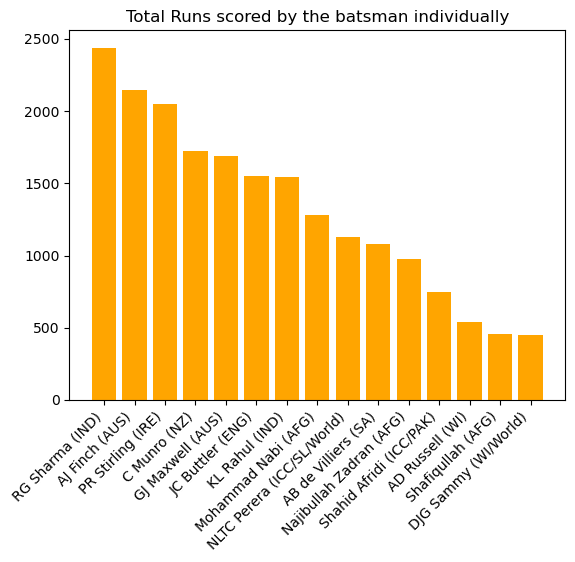

In [43]:
plt.bar(a['Player'],a['Runs'],color='Orange')
plt.title('Total Runs scored by the batsman individually')
plt.xticks(rotation=45,ha='right')
plt.show()

The plot shows the wide range of scoring from 2450 runs of Rohit sharma to 500 runs of DJG Sammy.

Rohit Sharma leads as the highest run scorer with more than 2400 runs, AJ Finch and PR Stirling are the close competetors for Rohit Sharma with more than 2000 runs.

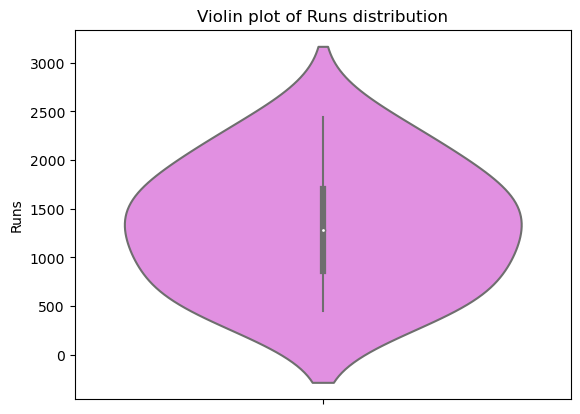

In [400]:
sns.violinplot(data=a,y='Runs',color='Violet')
plt.title('Violin plot of Runs distribution')
plt.show()

The above plot shows that most of the batsman runs are around 1500.

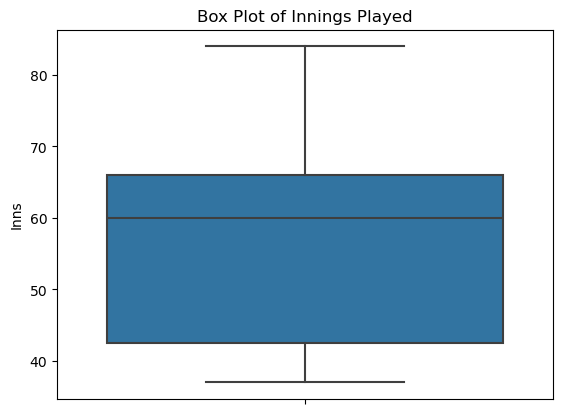

In [421]:
sns.boxplot(data=a, y='Inns')
plt.title("Box Plot of Innings Played")
plt.show()

The above plot shows the distribution of innings played by the batsman.From the graph we can understand that most of the batsman were played mostly around 60 innings.

C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


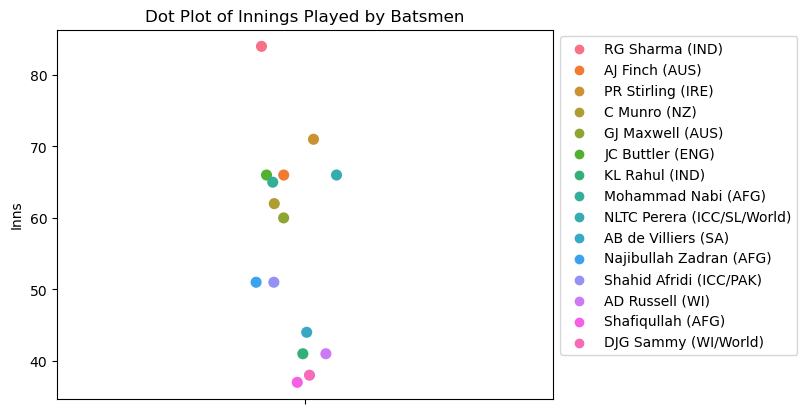

In [469]:
sns.stripplot(data=a, y='Inns',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played by Batsmen")
plt.show()

The above plot shows that most of the innings were played by `Rohit sharma` with more than 80 innings and other than him `PR Stirling` was the closest player who played around 70 innings.Least innings played by `Shafiqullah` and `DJG Sammy` around 37 to 40 innings.

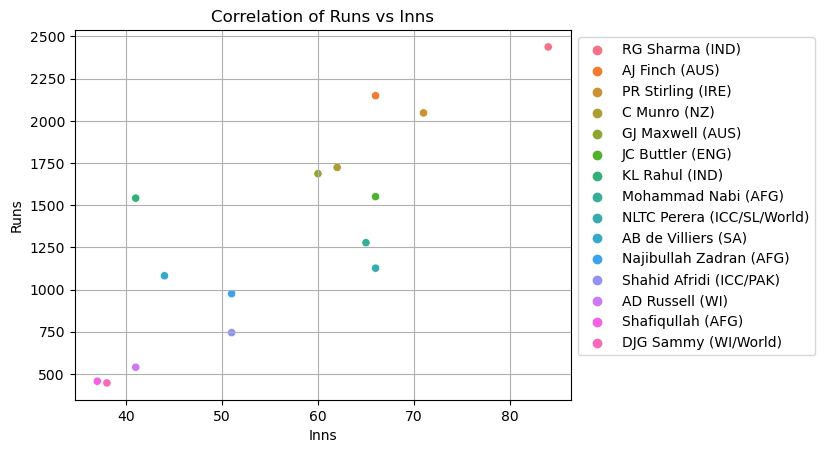

In [470]:
sns.scatterplot(data=a,x='Inns',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Inns')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows that the correlation between innings and runs in which on x-axis we have innings and on y-axis we have runs scored by the batsman.

Most of the innings played by `Rohit Sharma` and he is the leading run scorer,least innings were played by `Shafiqullah` and `DJG Sammy` and also they are the least run scorer.

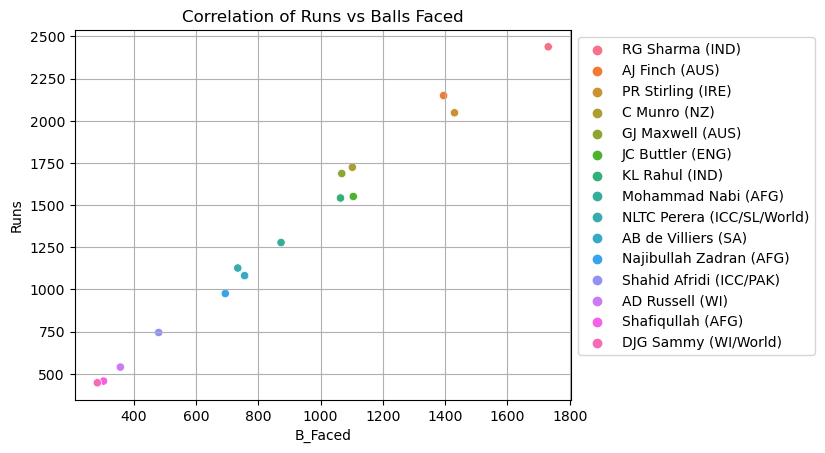

In [471]:
sns.scatterplot(data=a,x='B_Faced',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Balls Faced')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Runs scored vs Balls faced by the batsman in which on x-axis we have balls faced by the batsman and on y-axis we have runs scored by the batsman.

The most balls were faced by `Rohit Sharma` with around 1750 balls and also he is the leading run scorer around 2500,`AJ Finch` and `PR Sterling` are close to `Rohit Sharma` with around 1400 to 1500 balls and 2050 to 2150 runs.

The least balls were faced by `shafiqullah` and `DJG Sammy` with around 280 to 300 balls and runs were scored around 450 to 460 runs. 

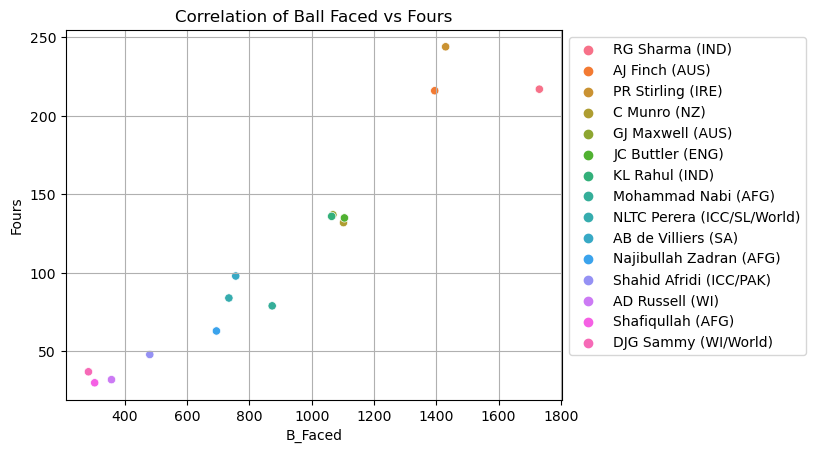

In [472]:
sns.scatterplot(data=a,x='B_Faced',y='Fours',hue='Player')
plt.grid(True)
plt.title('Correlation of Ball Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Balls faced by the batsman and how many fours scored by the batsman in that number of balls.`R Sharma` have faced more balls around 1800 and he scored around 215 fours,`PR Stirling` was in leading of scoring fours and he scored around 250 fours in around 1500 innings and `A Finch` was very close to them by scoring fours around 210 fours.

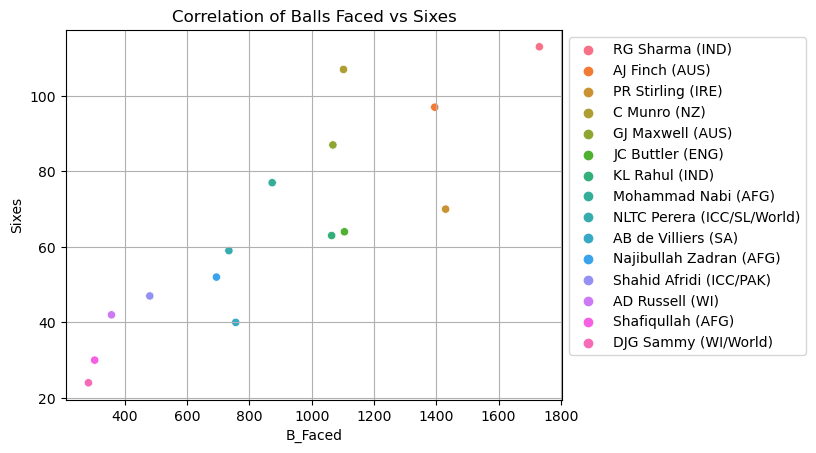

In [473]:
sns.scatterplot(data=a,x='B_Faced',y='Sixes',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Sixes')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Balls faced by the batsman and how many sixes scored by the batsman in that number of balls.`R Sharma` have faced more balls around 1800 and he scored around 115 sixes,`C Munro` was very close to Rohit Sharma by hitting around 110 sixes and he faced just around 1100 balls to hit those sixes.`A Finch` is also in the race along both `Rohit Sharma` and `C Munro` by hitting around 100 sixes approximately in 1450 balls.

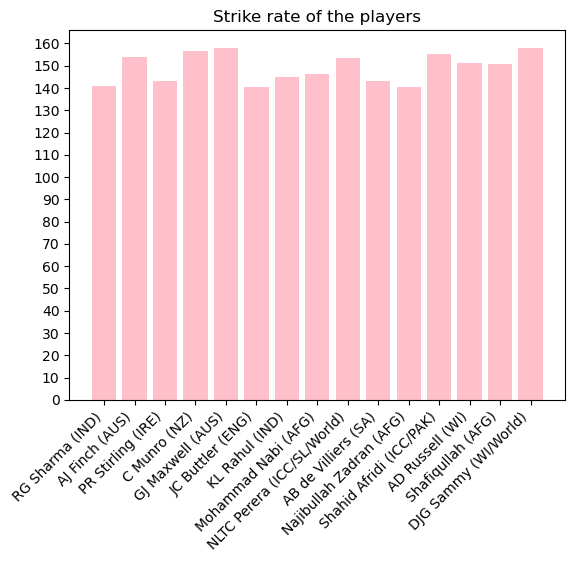

In [42]:
plt.bar(a['Player'],a['SR'],color='Pink')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.title('Strike rate of the players')
plt.xticks(rotation=45,ha='right')
plt.show()

The plot shows the strike rate of all players which of all are more than 140.
`GJ Maxwell` and `DJG Sammy` leading in strike rate with approximately 160.
Some players like `C Munro`,`AJ Finch` and `Shahid Afridi` are closest competetors with around 154 to 156.

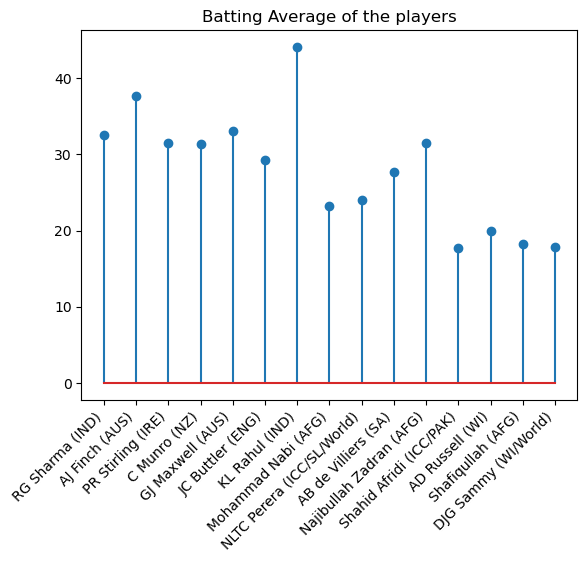

In [393]:
plt.stem(a['Player'],a['Ave'])
plt.xticks(rotation=45,ha='right')
plt.title('Batting Average of the players')
plt.show()

The above plot shows the Batting average of the players.`KL Rahul` is leading in batting average with an almost 45 and `AJ Finch` is the closest competetor for him with around 38.

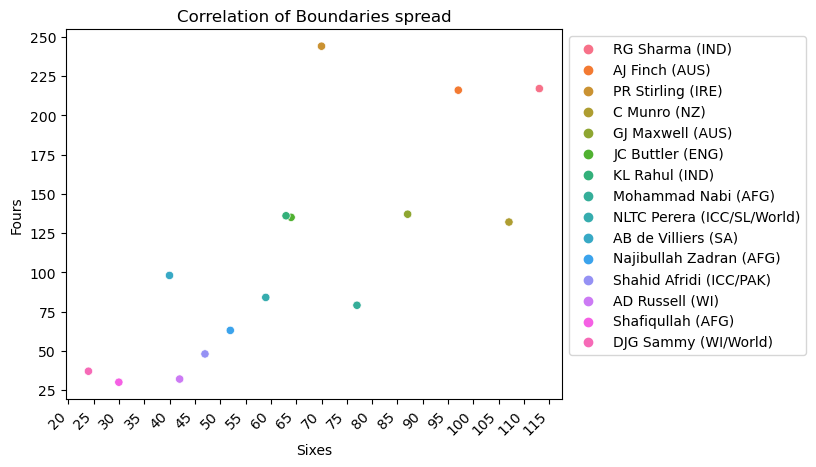

In [475]:
sns.scatterplot(x='Sixes',y='Fours',data=a,hue='Player')
plt.title('Correlation of Boundaries spread')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(5))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(25))
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=45,ha='right')
plt.show()

The above plot shows the boundaries of the player in which on x-axis we have sixes and on y-axis we have fours and points shows the spread of boundaries of players.

From the plot `PR Sterling` is leading in hitting Fours with almost 250 fours,`Rohit Sharma` and `AJ Finch` are very close to each other in hitting fours with around 225.`Rohit sharma` is leading in hitting sixes with almost 115 sixes and `C Munro` is closest competetor for `Rohit Sharma` having around 110 sixes.  

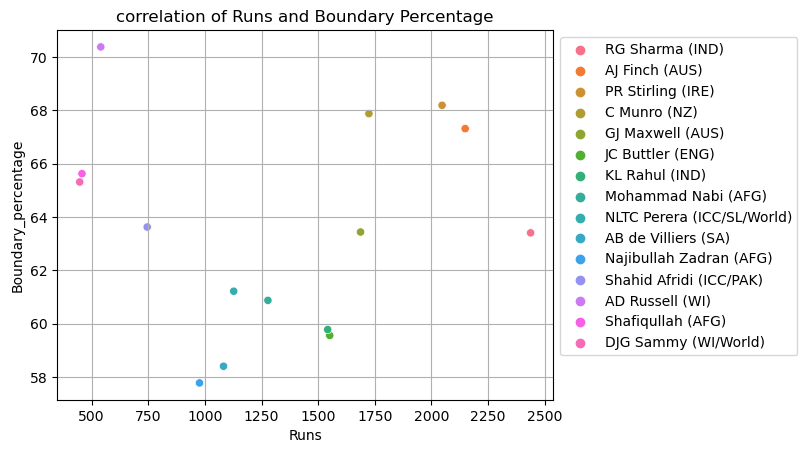

In [476]:
sns.scatterplot(data=a, x='Runs', y='Boundary_percentage',hue='Player')
plt.grid(True)
plt.title('correlation of Runs and Boundary Percentage')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the correlation between Runs and Boundary percentage of runs in which on x-axis we have runs and on y-axis we have boundary percentage.

From the plot we can see that `Rohit Sharma` is leading run scorer around 2500 runs with approximately 63 boundary percentage,`AD Russel` is leading in having boundary percentage with above 70 and having above more than 500 runs.`Nazibullah Zadran` having least boundary percentage approximately 55 with around 1000.

### No-3 and No-4 Batsman

In [37]:
b=Batters[(Batters['Matches']>=40) & (Batters['Inns']>=30) & (Batters['Ave']>35) & (Batters['SR']>135) & (Batters['Balls_faced/Innings']>=20)]

In [38]:
b

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.03125,2094,138.625,262,80,52.65625,27.0
3,AJ Finch (AUS),66,66,9,2149,37.68750,1395,154.000,216,97,67.31250,21.0
19,KL Rahul (IND),45,41,6,1542,44.06250,1064,144.875,136,63,59.78125,26.0


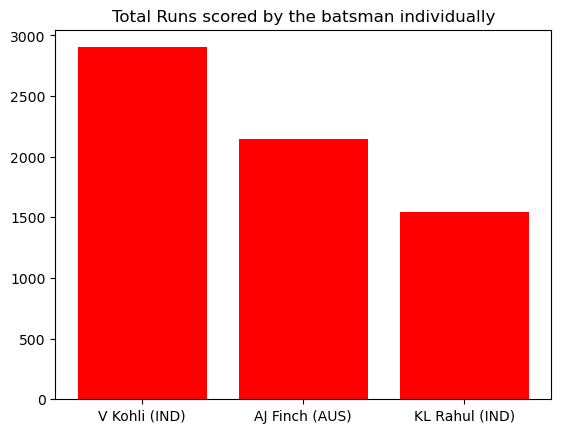

In [39]:
plt.bar(b['Player'],b['Runs'],color='Red')
plt.title('Total Runs scored by the batsman individually')
plt.show()

The above bar plot shows the Runs scored by the batsman.`Virat Kohli` is the leading run scorer with approximately 3000 runs.

C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


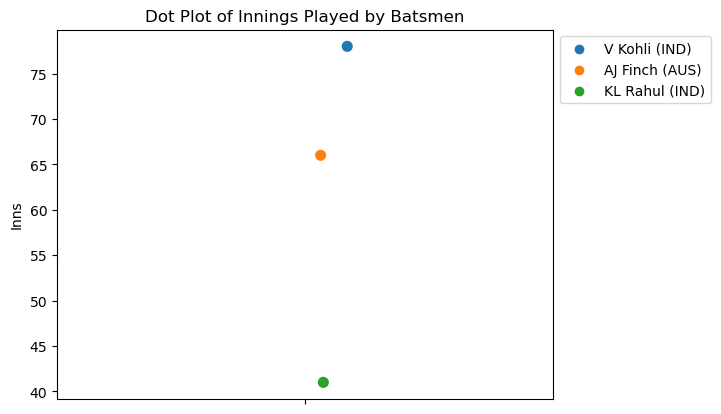

In [478]:
sns.stripplot(data=b, y='Inns',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played by Batsmen")
plt.show()

The above plot shows that total innings played by the batsman in that decade.`V Kohli` have contributed more with the bat with approximately 80 innings.

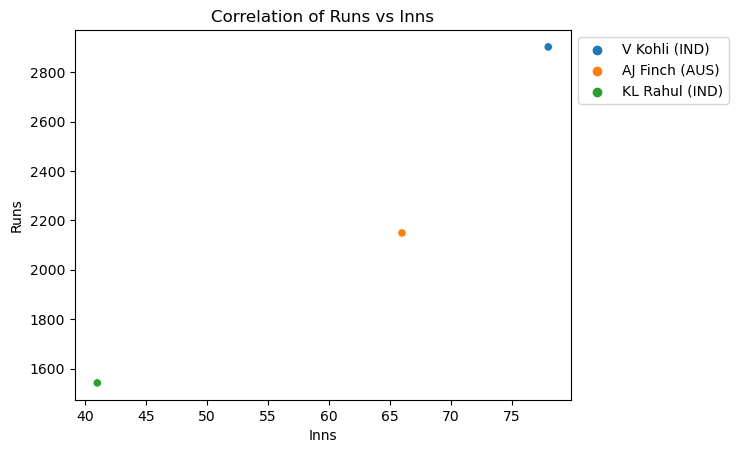

In [405]:
sns.scatterplot(data=b,x='Inns',y='Runs',hue='Player')
plt.title('Correlation of Runs vs Inns')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation plot of Runs and Innings,on x-axis we have innings played by the batsman and on y-axis we have runs scored by the batsman.`Virat Kohli` played more innings around 75 innings and also he is the leading run scorer with more than 2900 runs.

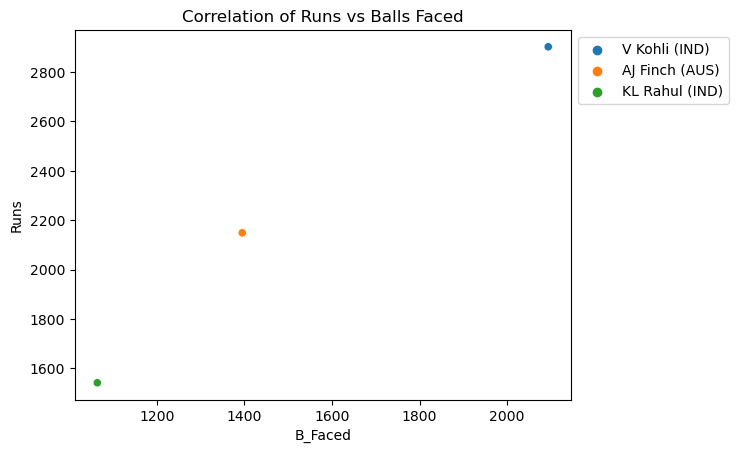

In [406]:
sns.scatterplot(data=b,x='B_Faced',y='Runs',hue='Player')
plt.title('Correlation of Runs vs Balls Faced')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation between Balls faced and Runs the batsman were scored.`Virat Kohli` played most of the innings more than 75 innings and he is the leading run scorer with more than 2900 runs.

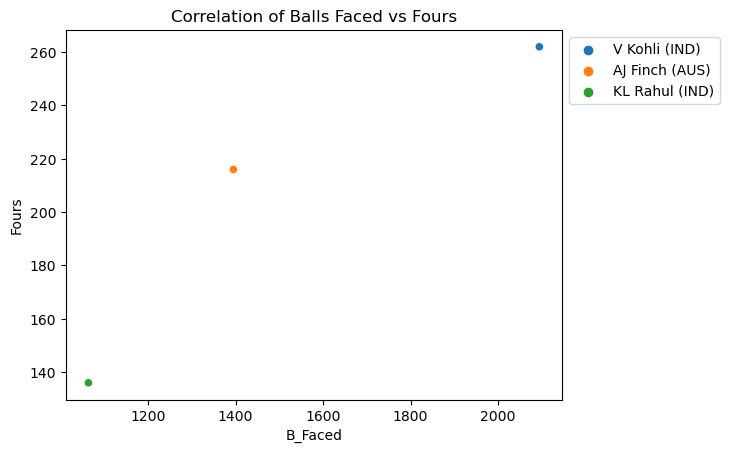

In [455]:
sns.scatterplot(data=b,x='B_Faced',y='Fours',hue='Player')
plt.title('Correlation of Balls Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced by the batsman and fours scored by the batman.`V Kohli` faced more balls around 2200 balls and he scored around 260 fours,`A Finch` faced around 1400 balls and scored approximately 220 fours and `KL Rahul` scored faced nearly 1000 balls and scored around 130 fours.

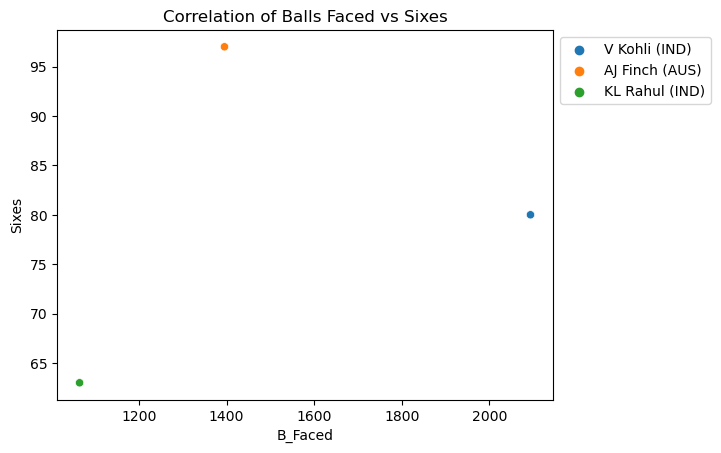

In [439]:
sns.scatterplot(data=b,x='B_Faced',y='Sixes',hue='Player')
plt.title('Correlation of Balls Faced vs Sixes')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Balls faced by the batsman and sixes that batsman scored.`A Finch` scored around 100 sixes and faced around 1400 balls and he is the leading in hitting sixes,`V Kohli` scored approximately 80 sixes in 2200 ballsand `KL Rahul` scored nearly 65 sixes in 1000 balls.

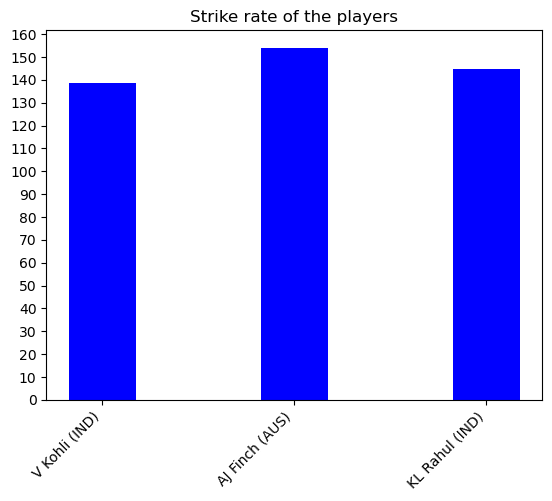

In [44]:
plt.bar(b['Player'],b['SR'],color='blue',width=0.35)
plt.title('Strike rate of the players')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.xticks(rotation=45,ha='right')
plt.show()

The above bar plot shows that the Strike Rates of the batsman.`A Finch` leading in strike rate having around 155,`V Kohli` and `KL Rahul` are very close to each other having around 140 to 145.

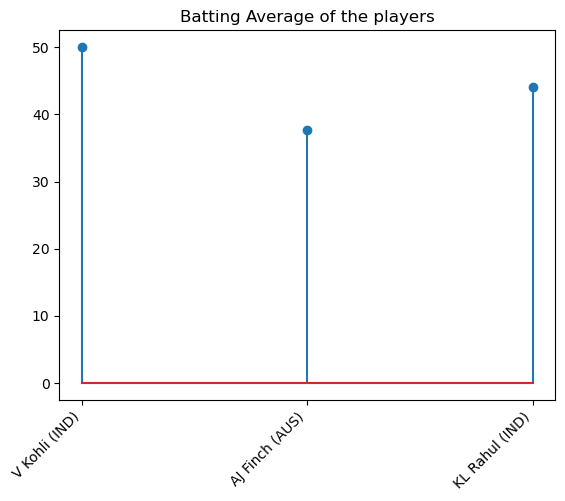

In [411]:
plt.stem(b['Player'],b['Ave'])
plt.xticks(rotation=45,ha='right')
plt.title('Batting Average of the players')
plt.show()

The above lollipop plot shows the average runs of the players.`V Kohli` is leading in average runs having more than 50,`KL Rahul` follows Virat Kohli like having average around 45 and `A Finch` have approximately 40 runs.

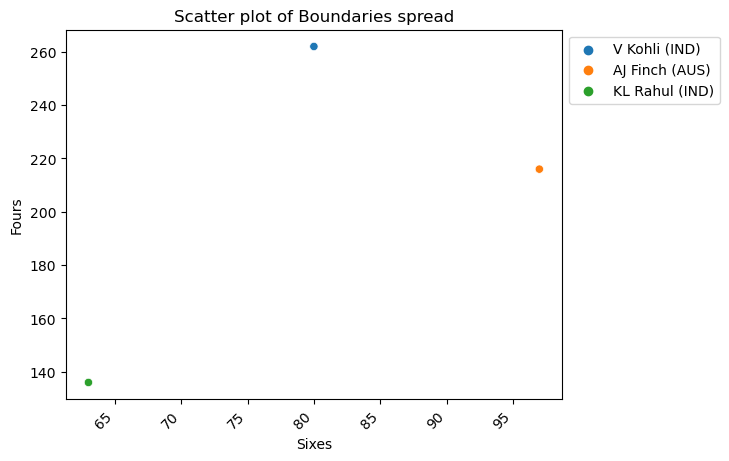

In [479]:
sns.scatterplot(x='Sixes',y='Fours',data=b,hue='Player')
plt.title('Scatter plot of Boundaries spread')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=45,ha='right')
plt.show()

The above plot shows the boundaries scored by the batsman.`V Kohli` scored more than 260 fours and 80 sixes,`A Finch` scored around 220 fours and 100 sixes and `KL Rahul` scored approximately 135 fours and 60 sixes.

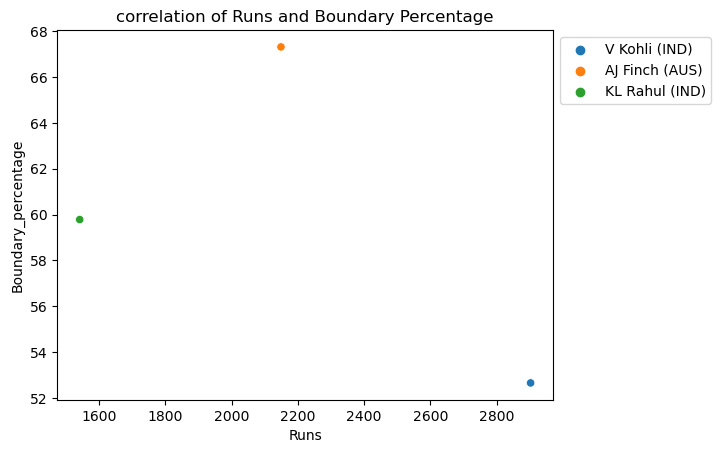

In [430]:
sns.scatterplot(data=b, x='Runs', y='Boundary_percentage',hue='Player')
plt.title('correlation of Runs and Boundary Percentage')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the correlation of Runs and Boundary percentage.On x-axis we have runs scored by the batsman and on y-axis we have the boundary percentage of runs.`A Finch` is having higher boundary percentage nearly 68% scoring around 2200 runs,`KL Rahul` is following A Finch having boundary percentage of nearly 60 by scoring around 1500 runs and atlast there is `V Kolhi` with more than 55% by scoring 2900 runs.

### No-5 batsman

In [56]:
c=Batters[(Batters['Matches']>=40) & (Batters['Inns']>=30) & (Batters['Ave']>30) & (Batters['SR']>130) & (Batters['B_Faced']>40)]

In [57]:
c

,Player,Matches,Inns,Not_outs,Runs,Ave,B_Faced,SR,Fours,Sixes,Boundary_percentage,Balls_faced/Innings
0,V Kohli (IND),83,78,20,2902,50.031250,2094,138.625,262,80,52.65625,27.0
1,RG Sharma (IND),89,84,9,2438,32.500000,1731,140.875,217,113,63.40625,21.0
2,MJ Guptill (NZ),71,69,5,2182,34.093750,1569,139.000,196,106,65.06250,23.0
3,AJ Finch (AUS),66,66,9,2149,37.687500,1395,154.000,216,97,67.31250,21.0
4,PR Stirling (IRE),72,71,6,2047,31.484375,1430,143.125,244,70,68.18750,20.0
7,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.500,207,70,70.00000,23.0
8,C Munro (NZ),65,62,7,1724,31.343750,1102,156.500,132,107,67.87500,18.0
11,GJ Maxwell (AUS),67,60,9,1687,33.062500,1068,158.000,137,87,63.43750,18.0
14,AD Hales (ENG),60,60,7,1644,31.015625,1203,136.625,175,55,62.65625,20.0
15,DA Warner (AUS),58,58,9,1619,33.031250,1187,136.375,156,58,60.03125,20.0


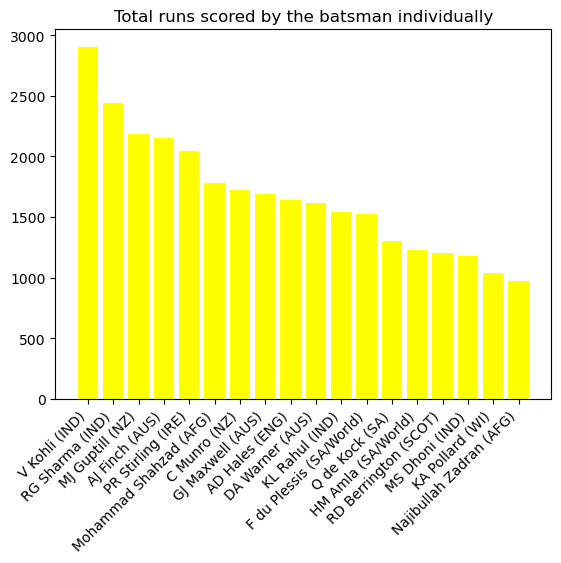

In [52]:
plt.bar(c['Player'],c['Runs'],color='Yellow')
plt.title('Total runs scored by the batsman individually')
plt.xticks(rotation=45,ha='right')
plt.show()

The above bar plot shows the runs scored by the batsman.`V Kohli` is the leading run scorer among all of them with around 2900 runs and next there is `R Sharma` with around 2400 runs and `Najibullah Zadran` is least in scoring runs with approximately 1000 runs.

In [1]:
sns.stripplot(data=c, y='Inns',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played by Batsmen")
plt.show()

NameError: name 'sns' is not defined

The above plot shows that how many innings had been played by the batsman.There is `R Sharma` is leading in contributing with the bat around 85 innings and `V Kohli` follows him playing in approximately 80 innings and `KL Rahul` is the one who played in least innings around 40 innings.

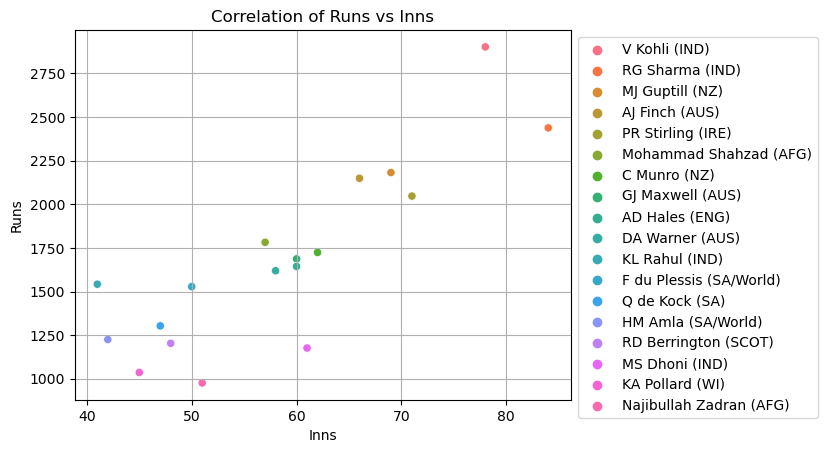

In [54]:
sns.scatterplot(data=c,x='Inns',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Inns')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Runs and innings.`Virat Kohli` is the leading run scorer and played around 85 innings,`R Sharma` follows V Kohli by scoring around 2500 runs in around 80 innings,`KA Pollard` is the one who played in least innings approximately 45 and scored around 1000 runs and `Najibullah Zadran` follows him by playing in around 50 innings and scoring around 1000 runs.

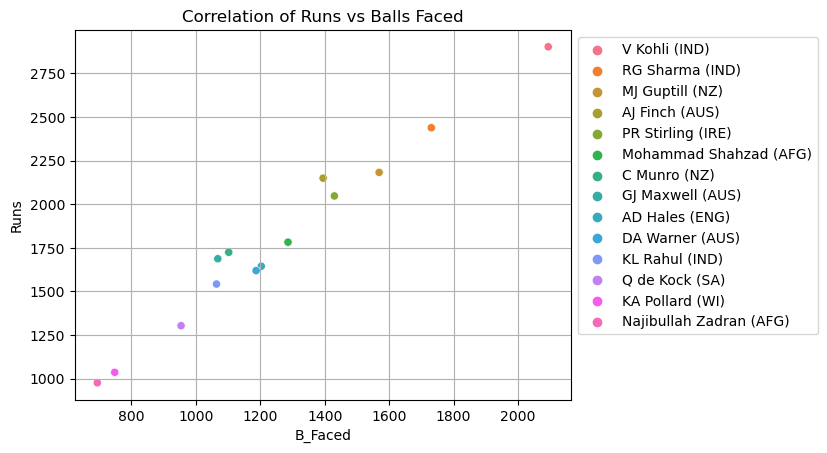

In [483]:
sns.scatterplot(data=c,x='B_Faced',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Balls Faced')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the Runs scored and balls faced by the batsman.`V Kohli` is leading in runs and faced around 2100 balls and in the next `R Sharma` following him by scoring 2500 runs and facing around 1700 balls.`KA Pollard` and `Najibullah Zadran` is least in scoring runs and also faced the balls.

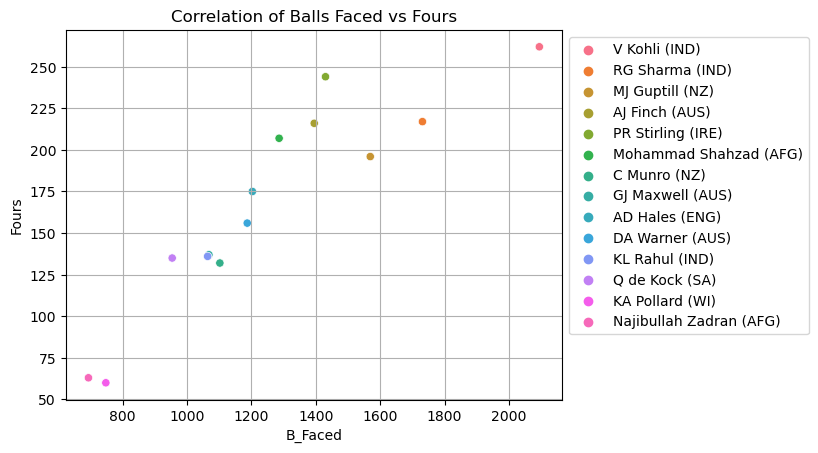

In [484]:
sns.scatterplot(data=c,x='B_Faced',y='Fours',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Balls faced and fours scored by the batsman.`V Kohli` is the one who scored most fours by facing around 2100 balls,`PR Sterling` is following him scoring around 250 fours in 1400 balls.`KA Pollard` and `Najibullah Zadran` is least in scoring fours and also faced the balls.

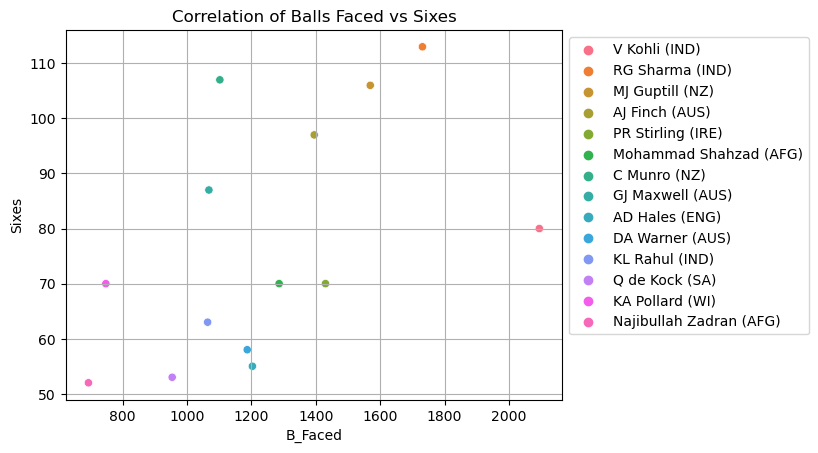

In [485]:
sns.scatterplot(data=c,x='B_Faced',y='Sixes',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Sixes')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Balls faced and fours scored by the batsman.`R Sharma` is the one who scored most sixes by facing around 1700 balls,`C Munro` and `M Guptil` is following him scoring around 100 to 110 sixes by facing `C Munro` around 1100 balls and `MJ Guptil` around 1600 balls.`Q de Kock`,`Najibullah Zadran` and `AD Hales` are scoring around 55 sixes in least.


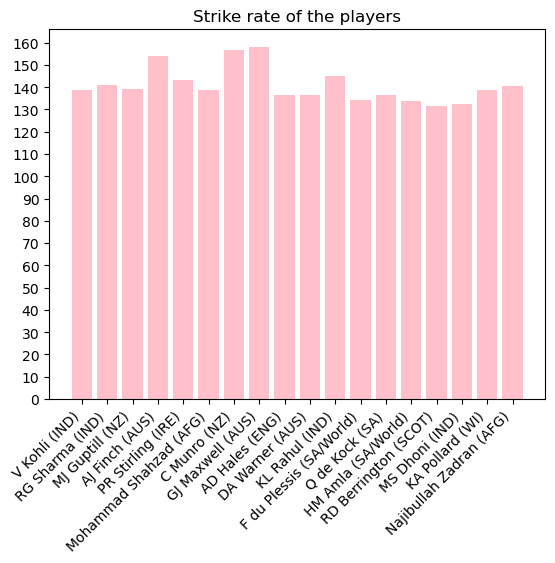

In [55]:
plt.bar(c['Player'],c['SR'],color='pink')
plt.title('Strike rate of the players')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.xticks(rotation=45,ha='right')
plt.show()

The above bar plot shows the strike rates of the players.`Gj Maxwell` is having high strike rate among them and `C Munro` and `A Finch` are very close to Maxwell.

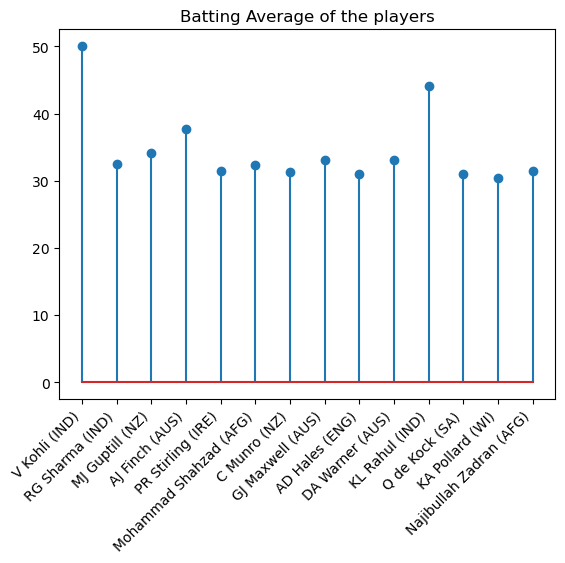

In [463]:
plt.stem(c['Player'],c['Ave'])
plt.xticks(rotation=45,ha='right')
plt.title('Batting Average of the players')
plt.show()

The above lollipop chart shows the average score of the players.`V Kohli` is having high average than others of 50 and `KL Rahul` is somewhat close to him having average of around 45.

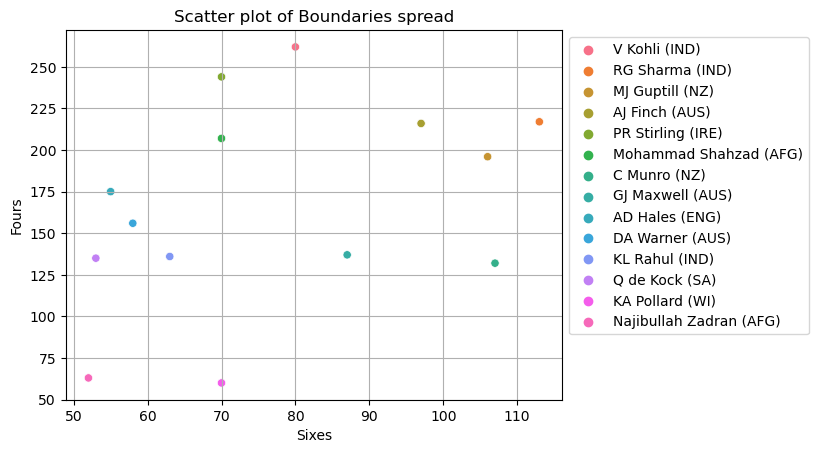

In [526]:
sns.scatterplot(x='Sixes',y='Fours',data=c,hue='Player')
plt.grid(True)
plt.title('Scatter plot of Boundaries spread')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the spread of boundaries of the batsman.`V Kohli` was leading in scoring fours with above 250 fours,`R Sharma` was leading in scoring sixes hitting approximately 215 sixes.

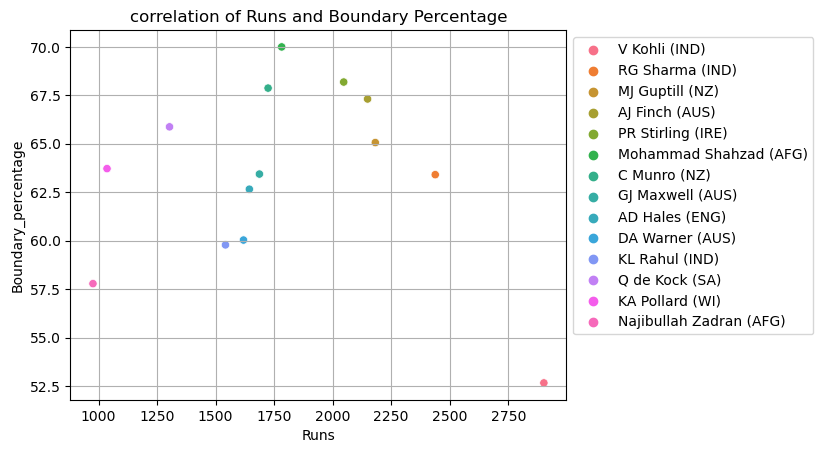

In [487]:
sns.scatterplot(data=c, x='Runs', y='Boundary_percentage',hue='Player')
plt.grid(True)
plt.title('correlation of Runs and Boundary Percentage')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the boundary percentage of the players.`Mohammad Shahzad` is leading boundary percentage having around 70% and he scored nearly 1800 runs.

### Wicket keeper Batter

In [83]:
d=WK_Batters[(WK_Batters['Matches']>40) & (WK_Batters['Bat_SR']>130) & (WK_Batters['Bat_Ave']>30) & (WK_Batters['Balls_Faced/Inns']>=15)]

In [498]:
d

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,Balls_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_as_Keeper,Cts,Sts,D_Ave_per_Inns,Total Dis
0,Mohammad Shahzad (AFG),57,57,2,1782,32.406250,1286,138.500,207,70,70.00000,23.0,57,22.0,25.0,0.824,47.0
2,KL Rahul (IND),45,41,6,1542,44.062500,1064,144.875,136,63,59.78125,26.0,44,17.0,1.0,0.409,18.0
3,Q de Kock (SA),47,47,5,1303,31.015625,954,136.625,135,53,65.87500,20.0,47,41.0,11.0,1.106,52.0
6,MS Dhoni (IND),73,61,35,1176,45.218750,889,132.250,90,39,50.50000,15.0,73,46.0,31.0,1.054,77.0


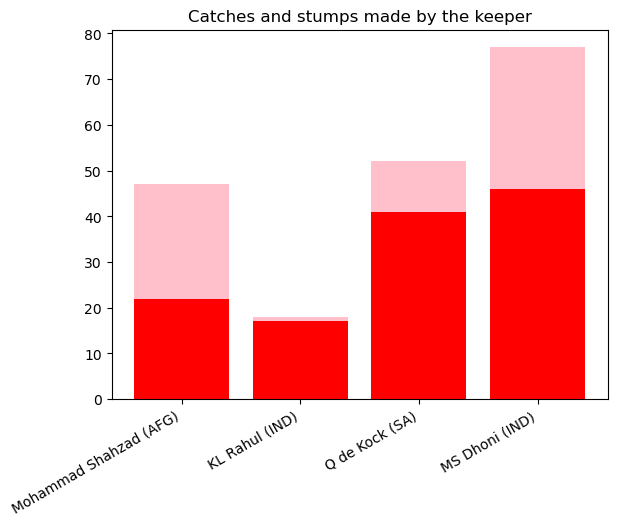

In [539]:
plt.bar(d['Player'],d['Cts'],color='Red')
plt.bar(d['Player'],d['Sts'],color='Pink',bottom=d['Cts'])
plt.title('Catches and stumps made by the keeper')
plt.xticks(rotation=30,ha='right')
plt.show()

The above plot shows the Dismissals made by the keeper,`Red` colour indecates total catches he took and `Pink` indicates total stumpings he made.From the plot we can see that `MS Dhoni` took more catches around 50 and also more stumpings approximately 30,`Q de Kock` is almost equal in catching with `MS Dhoni` but Q de Kock did only around 10 stumpings but MS Dhoni did more than him,`Mohammad Shahzad` and `KL Rahul` are almost equal in taking catches around 20 but `Mohammad Shahzad` did more stumpings than `KL Rahul` doing around 25 stumpings.

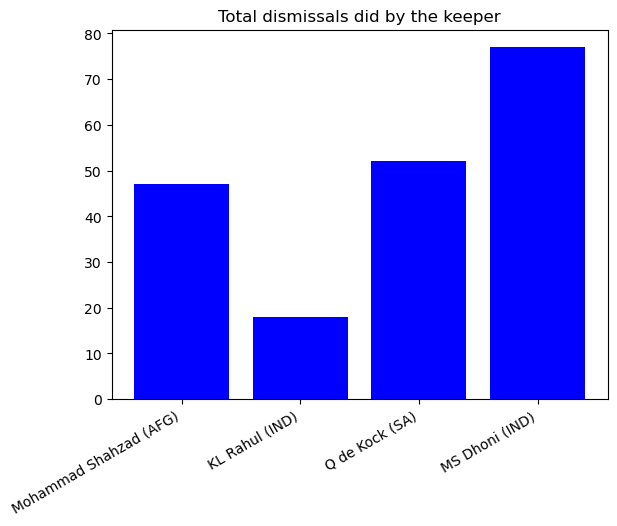

In [538]:
plt.bar(d['Player'],d['Total Dis'],color='Blue')
plt.title('Total dismissals did by the keeper')
plt.xticks(rotation=30,ha='right')
plt.show()

The above plot shows the Total dismissals made by the keepers.From the plot we can see that `MS Dhoni` is leading in total dismissals by doing around 80 dismissals,`Q de KOck` and `Mohammad Shahzad` are almost equal doing around 50 dismissals and `KL Rahul` did around 20 dismissals.

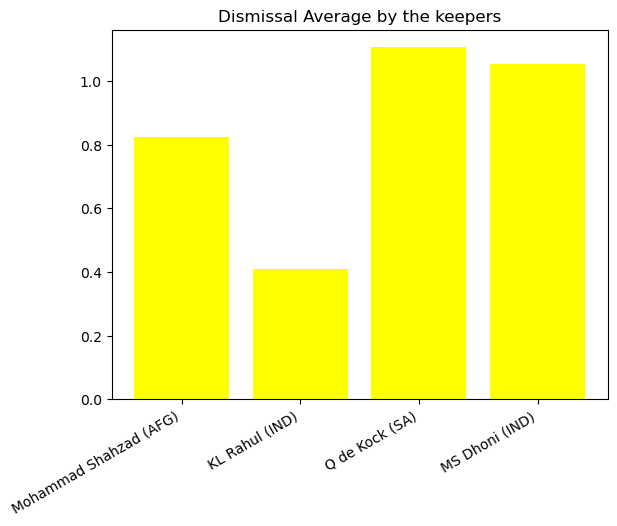

In [537]:
plt.bar(d['Player'],d['D_Ave_per_Inns'],color='Yellow')
plt.title('Dismissal Average by the keepers')
plt.xticks(rotation=30,ha='right')
plt.show()

The above plot shows the average dismissal made by the keeper per innings.From the plot we can see that `Q de Cock` and `MS Dhoni` are almost equal having average around 1 to 1.5,`Mohammad Shahzad` have an average around 0.8 and `KL Rahul` have an average of 0.4.

C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


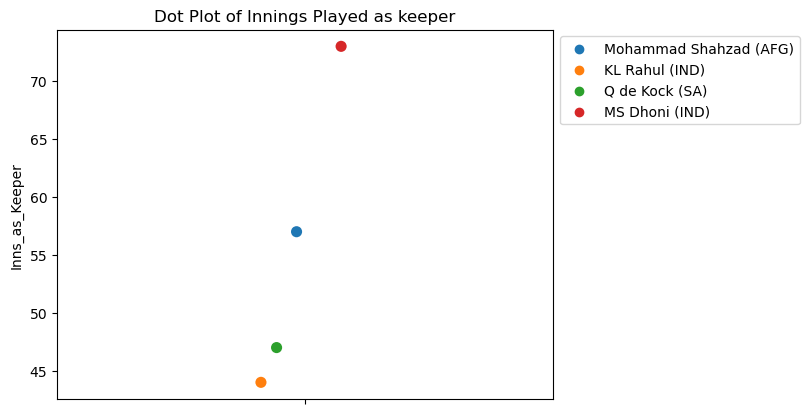

In [544]:
sns.stripplot(data=d, y='Inns_as_Keeper',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played as keeper")
plt.show()

The above plot shows innings played as keeper by the player.`MS Dhoni` played more matches as keeper around 75 innigs and in the next we have `Mohammad Shahzad` played around 58 innings,`Q de Kock` and `KL Rahul` played around 45 to 50 innings as keeper.

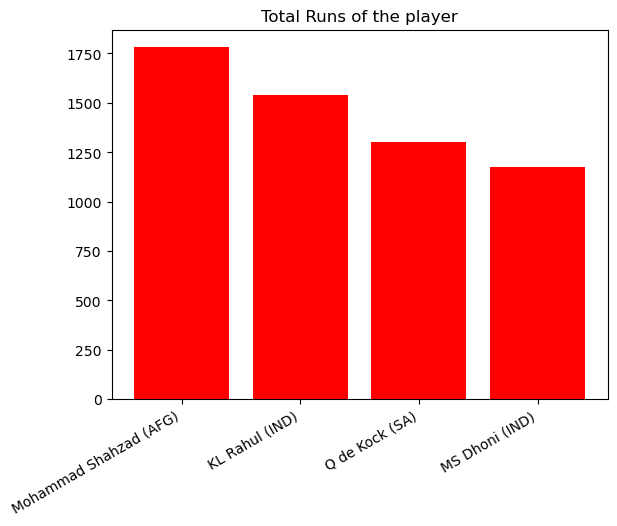

In [542]:
plt.bar(d['Player'],d['Runs'],color='Red')
plt.xticks(rotation=30,ha='right')
plt.title('Total Runs of the player')
plt.show()

The above plot shows the total runs made by the keeper.From the graph we can see that `Mohammad Shahzad` was leading in runs scoring around 1750 runs and `KL Rahul` follows him by scoring around 1500 runs.`Q de Kock` scored around 1300 runs and `MS Dhoni` scored around 1200 runs.

C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


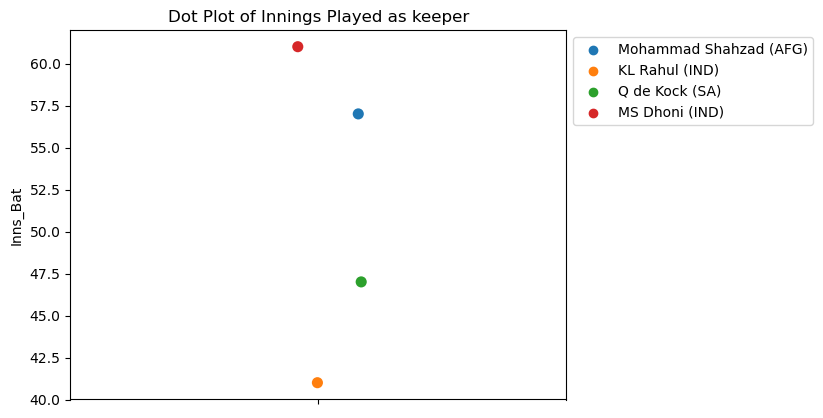

In [573]:
sns.stripplot(data=d, y='Inns_Bat',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played as keeper")
plt.show()

The above plot shows the innings played by the keeper as batsman.From the plot we can see that `MS Dhoni` played more matches as batsman than others by playing more than 60 innings and `M shahzad` following him by playing around 57 innings as batsman.`Q de Kock` played around 47 innings and `KL Rahul` played around 41 innings.

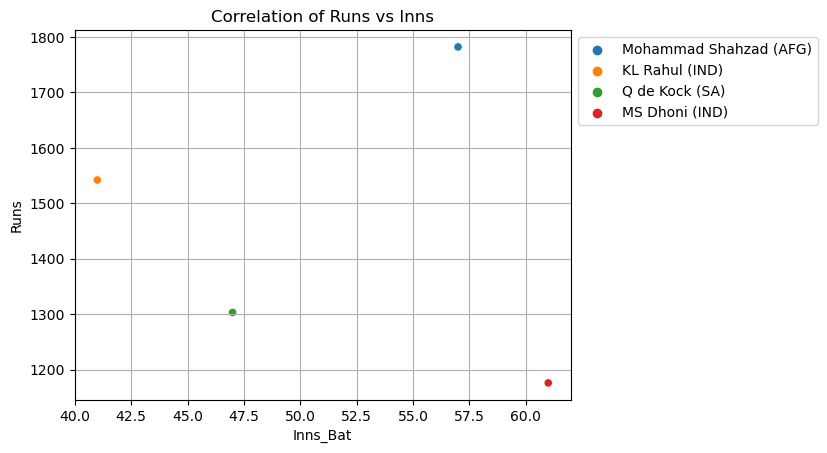

In [501]:
sns.scatterplot(data=d,x='Inns_Bat',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Inns')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Runs scored by the batsman and in number of innings he played as batsman.`M Shahzad` scored more runs than others by playing around 57 innings,`KL Rahul` scored around 1550 runs in 42 innings,`Q de Kock` scored approximately 1300 runs in 47 innings and `MS Dhoni`scored around 1150 runs in 62 innings.

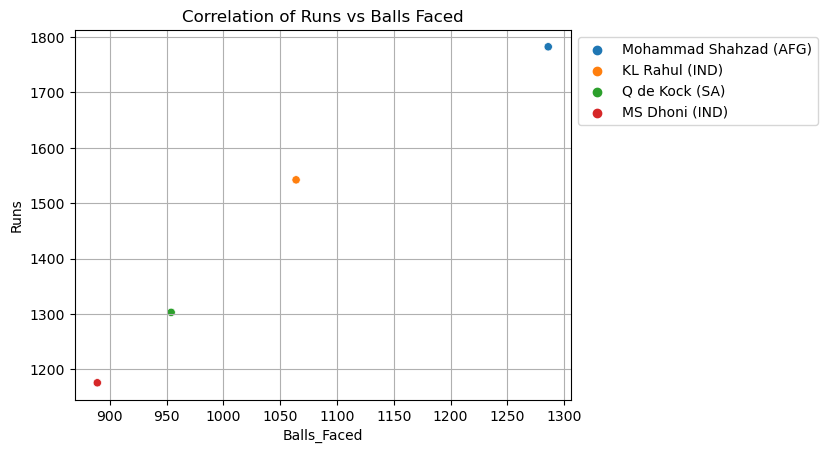

In [504]:
sns.scatterplot(data=d,x='Balls_Faced',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Balls Faced')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced by the player and runs he scored.From the plot we can see that `M Shahzad` scored more runs around 1800 and also he faced more balls around 1300,`KL Rahul` follows him scoring around 1550 runs in 1065 balls,`Q de Kock` scored 1300 runs in 950 balls and `MS Dhoni` scored 1150 runs in 880 balls.

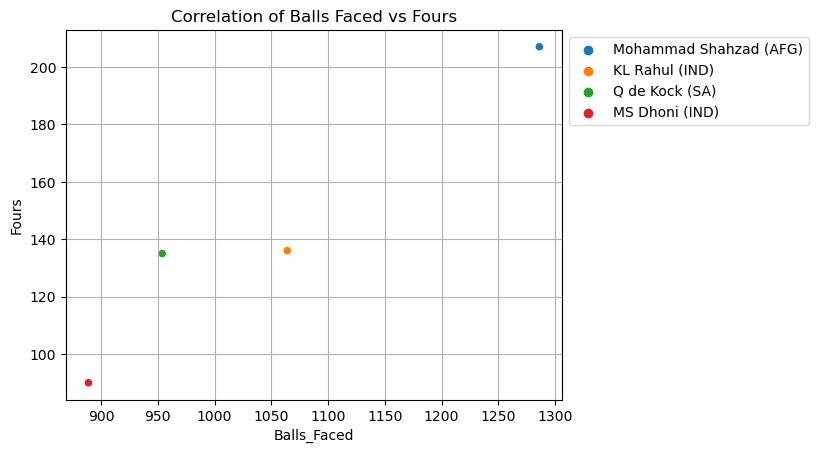

In [506]:
sns.scatterplot(data=d,x='Balls_Faced',y='Fours',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced and fours he scored in that balls.From the plot we can see that `M Shahzad` is leading in scoring fours and he scored around 210 fours in 1300 balls,`KL Rahul` and `Q de Kock` scored fours almost equal but KL Rahul faced more balls around 1070 but De Kock just faced 950 balls and `MS Dhoni` scored around 95 fours in 880 balls.

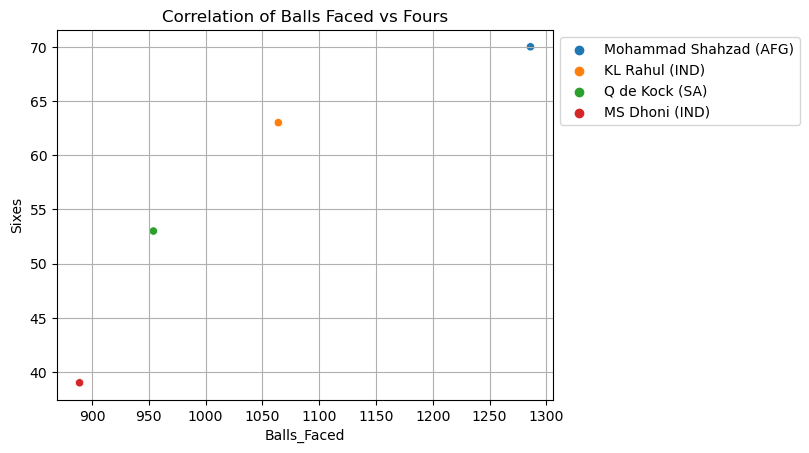

In [507]:
sns.scatterplot(data=d,x='Balls_Faced',y='Sixes',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced and sixes he scored in that balls.From the plot we can see that `M Shahzad` is leading in scoring sixes and he scored 70 sixes in 1300 balls,`KL Rahul` scored around 65 sixes in 1070 balls,`Q de Kock` scored around 55 sixes in 950 balls and `MS Dhoni` scored around 38 sixes in 880 balls.

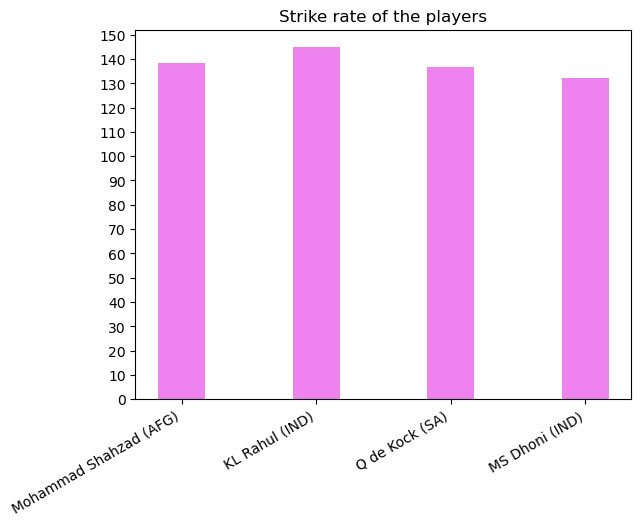

In [104]:
plt.bar(d['Player'],d['Bat_SR'],color='Violet',width=0.35)
plt.title('Strike rate of the players')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.xticks(rotation=30,ha='right')
plt.show()

The above plot shows the batting strike rate of the players.If we see the plot almost all are having equal strike rate but `KL Rahul` was having bit high strike rate of around 145.

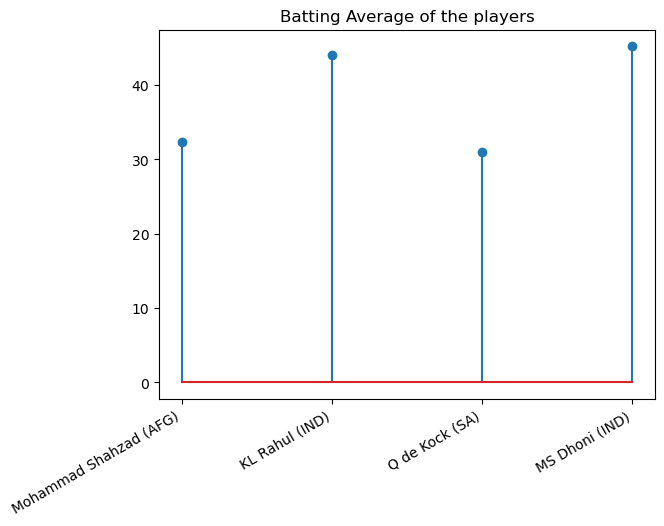

In [523]:
plt.stem(d['Player'],d['Bat_Ave'])
plt.xticks(rotation=30,ha='right')
plt.title('Batting Average of the players')
plt.show()

The above plot shows the batting average of the players.From the plot we can see that `MS Dhoni` and `KL Rahul` have almost equal average around 45,`M Shahzad` and `Q de Kock` also having almost equal average around 32.

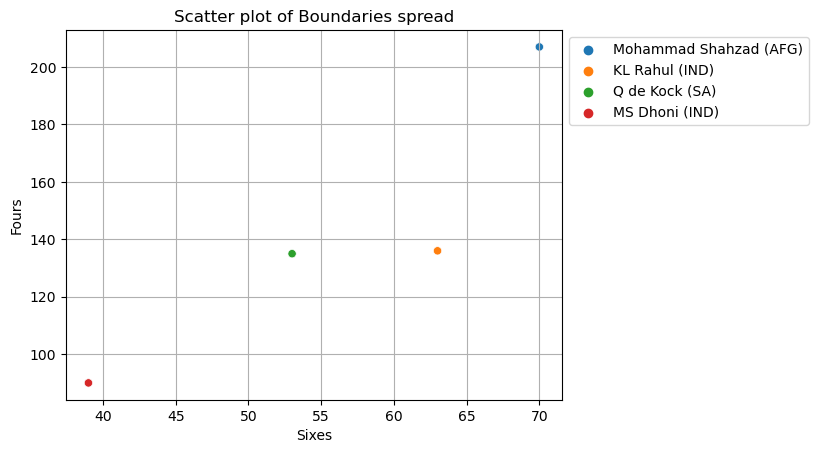

In [525]:
sns.scatterplot(x='Sixes',y='Fours',data=d,hue='Player')
plt.grid(True)
plt.title('Scatter plot of Boundaries spread')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the boundaries spread of the players.`M Shahzad` have scored more than 200 fours and 70 sixes,'KL Rahul` scored around 140 fours and 63 sixes,`Q de Kock` scored around 140 fours and 53 sixes and `MS Dhoni` scored around 90 fours and 38 sixes.

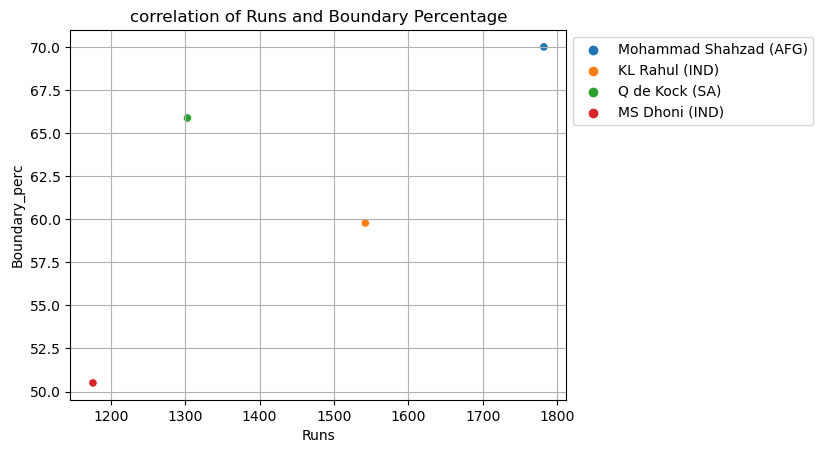

In [528]:
sns.scatterplot(data=d, x='Runs', y='Boundary_perc',hue='Player')
plt.grid(True)
plt.title('correlation of Runs and Boundary Percentage')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the correlation of boundary percentage and Runs.`M Shahzad` have high boundary percentage having around 70% and scored around 1800 runs,`Q de Kock` have around boundary percent of 66 and scored 1300 runs and `MS Dhoni` have boundary percentage more than 50 and scored around 1150 runs.|

### All-rounders

In [81]:
e=All_Rounders[(All_Rounders['Matches']>40) & (All_Rounders['Bat_Ave']>30) & (All_Rounders['Bat_SR']>130) & (All_Rounders['Eco']<9) & (All_Rounders['Bowl_SR']<30) & (All_Rounders['Bowl_Ave']<30)]

In [565]:
e

,Player,Matches,Inns_Bat,Not_outs,Runs,Bat_Ave,B_Faced,Bat_SR,Fours,Sixes,Boundary_perc,Balls_Faced/Inns,Inns_Bowled,Overs,Wkts,Bowl_Ave,Eco,Bowl_SR
6,GJ Maxwell (AUS),67,60,9,1687,33.06250,1068,158.0,137,87,63.43750,18.0,44,103.0,29.0,26.66,7.50,21.3
15,RD Berrington (SCOT),53,48,9,1203,30.84375,915,131.5,114,36,55.87500,19.0,29,62.4,22.0,23.00,8.07,17.0
21,KA Pollard (WI),56,45,11,1036,30.46875,748,138.5,60,70,63.71875,17.0,33,70.2,26.0,23.38,8.64,16.2


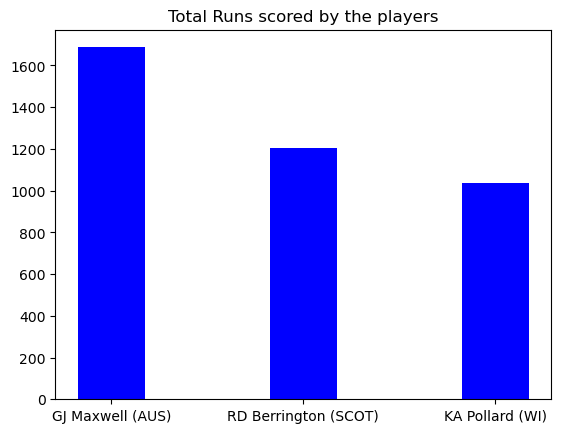

In [628]:
plt.bar(e['Player'],e['Runs'],color='Blue',width=0.35)
plt.title('Total Runs scored by the players')
plt.show()

The above plot shows the total runs scored by all-rounders individually.From the graph we can see that `GJ Maxwell` is the leading run scorer by scoring around 1700 runs,`RD Berrington` and `KA Pollard` have scored almost equally around 1100 to 1200 runs.

C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\095bh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


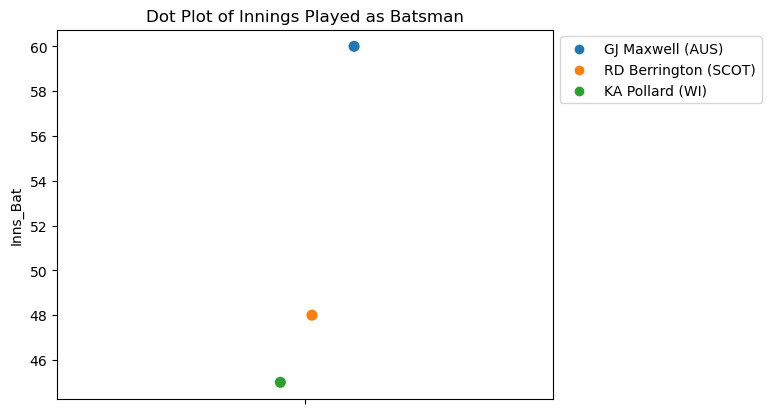

In [577]:
sns.stripplot(data=e, y='Inns_Bat',size=8,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title("Dot Plot of Innings Played as Batsman")
plt.show()

The above plot shows that innings played by the players as batsman.`Gj Maxwell` have contributed more with the bat in around 60 innings,`RD Berrington` have played with the bat in around 50 innings and `KA Pollard` played around in 45 innings.

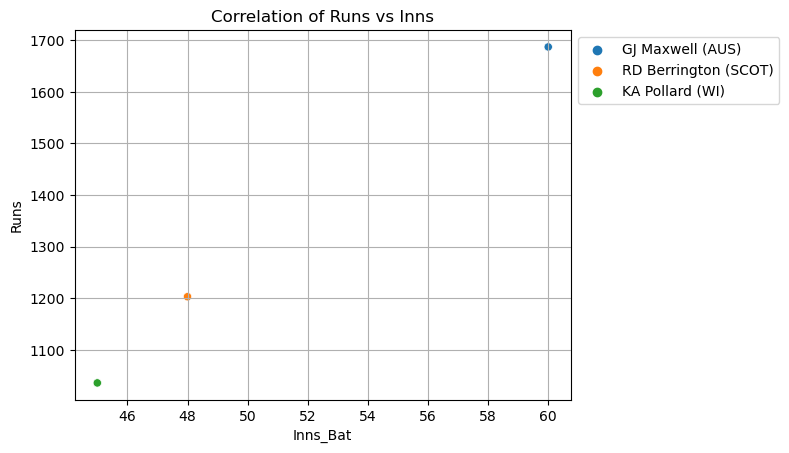

In [578]:
sns.scatterplot(data=e,x='Inns_Bat',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Inns')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of Runs scored and innings by the batman.`Gj Maxwell` is the leading run scorer who scored around 1700 runs in 60 innings,`RD Berrington` scored 1200 runs in 48 innings and `KA Pollard` scored around 1050 runs in 45 innings.

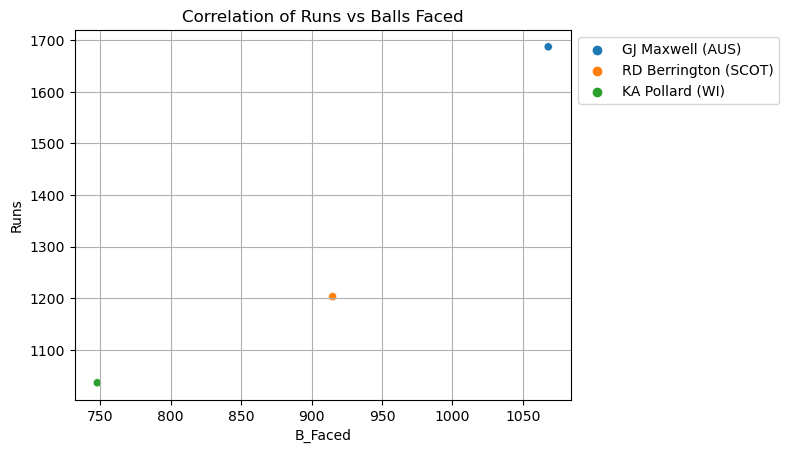

In [632]:
sns.scatterplot(data=e,x='B_Faced',y='Runs',hue='Player')
plt.grid(True)
plt.title('Correlation of Runs vs Balls Faced')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced and runs scored by the batsman in that balls.`Gj Maxwell` scored around 1700 runs un 1075 balls,`RD Berrington` scored 1200 runs in around 920 balls and `KA Pollard` scored around 1050 runs in 750 balls.

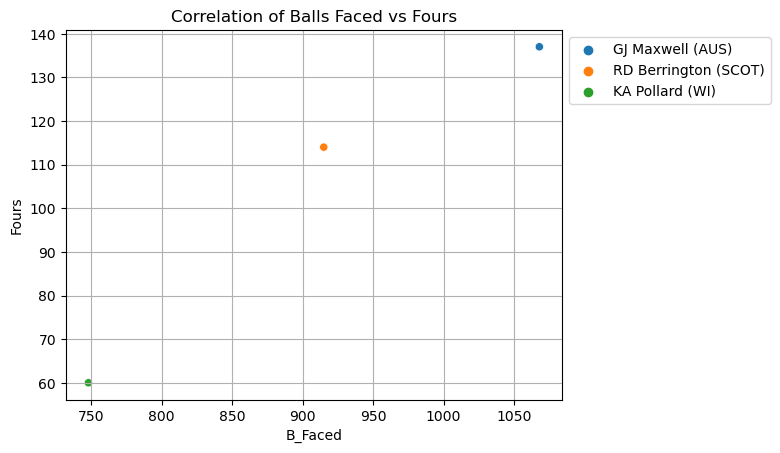

In [634]:
sns.scatterplot(data=e,x='B_Faced',y='Fours',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Fours')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced and fours scored by the batsman.From the plot we can see that `GJ Maxwell` scored around 140 fours by facing 1170 balls,`RD Berrington` scored around 115 fours in 920 balls and `KA Pollard` scored 60 fours in 750 balls.

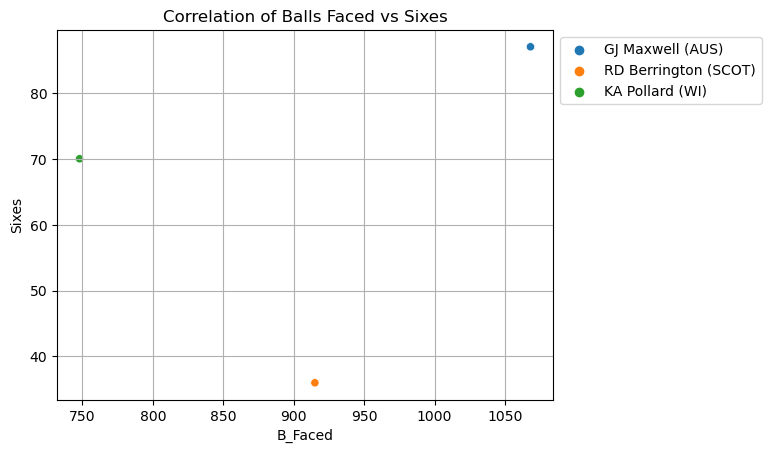

In [635]:
sns.scatterplot(data=e,x='B_Faced',y='Sixes',hue='Player')
plt.grid(True)
plt.title('Correlation of Balls Faced vs Sixes')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()

The above plot shows the correlation of balls faced and sixes scored by the batsman.From the plot we can see that `GJ Maxwell` scored around 90 sixes by facing 1170 balls,`KA Pollard` scored 70 sixes in 750 balls and `RD Berrington` scored around 37 sixes in 920 balls.

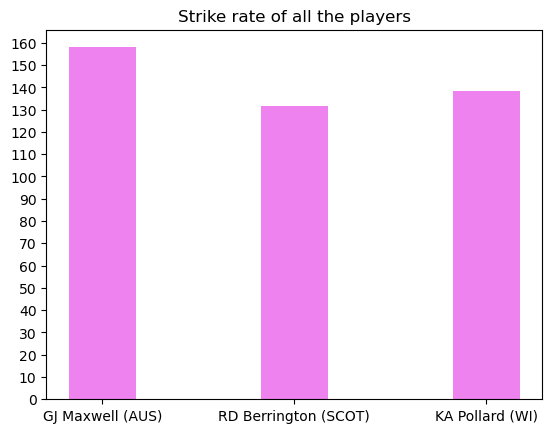

In [103]:
plt.bar(e['Player'],e['Bat_SR'],color='Violet',width=0.35)
plt.title('Strike rate of all the players')
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(10))
plt.show()

The above plot shows the batting strike rate of the players.`GJ Maxwell` is in top in strike rate as always with around 160,`RD Berrington` and `KA Pollard` are almost equal around 130 to 135 but Pollard was somewhat high.

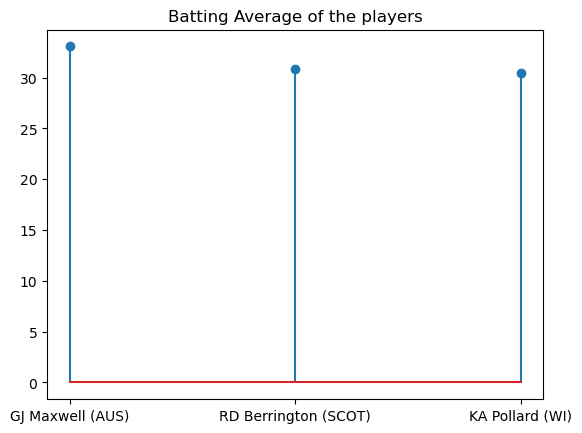

In [588]:
plt.stem(e['Player'],e['Bat_Ave'])
plt.title('Batting Average of the players')
plt.show()

The above plot shows the batting average of the players.Even here `GJ maxwell` is leading in batting average with around 35,`RD Berrington` and `KA Pollard` are almost equal here also with around 30.

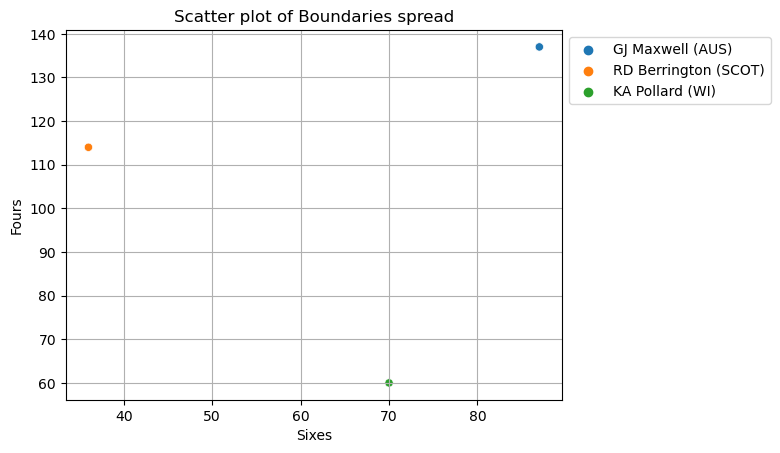

In [589]:
sns.scatterplot(x='Sixes',y='Fours',data=e,hue='Player')
plt.grid(True)
plt.title('Scatter plot of Boundaries spread')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the boundaries spread of the players.`GJ Maxwell` scored around 140 fours and 88 sixes,`RD Berrington` scored around 115 fours and 35 sixes and `KA Pollard` scored 60 fours and 70 sixes.

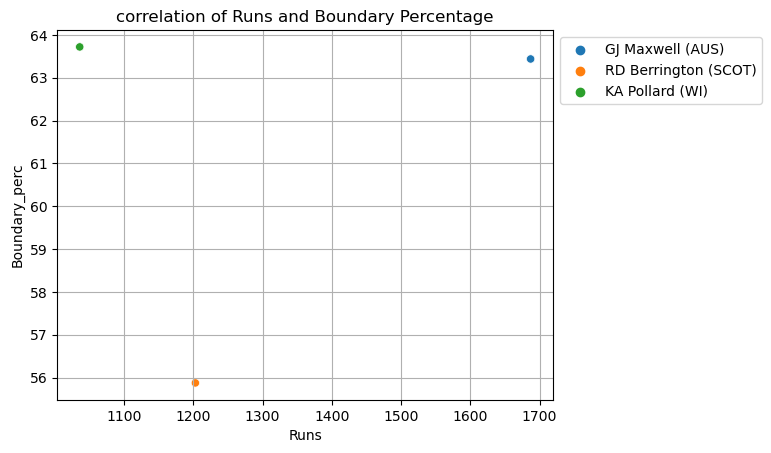

In [637]:
sns.scatterplot(data=e, x='Runs', y='Boundary_perc',hue='Player')
plt.grid(True)
plt.title('correlation of Runs and Boundary Percentage')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

The above plot shows the correlation of runs scored and boudary percentage of the batsman,`GJ Maxwell` scored around 1700 runs also he is in leading and have boundary percentage of 63,`RD Berrington` scored 1200 runs and have boundary percentage of 56 and `KA Pollard` scored around 1050 runs and have a boundary percentage of 64.

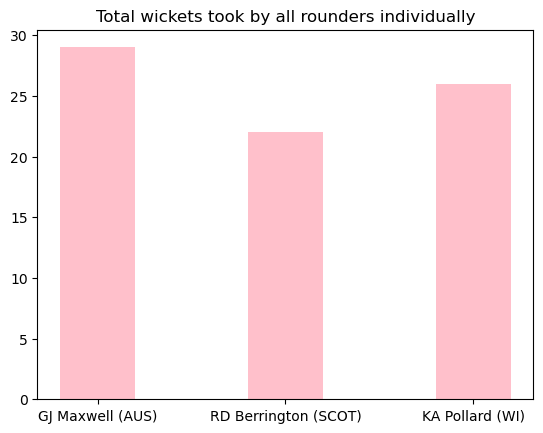

In [96]:
plt.bar(e['Player'],e['Wkts'],color='Pink',width=0.4)
plt.title('Total wickets took by all rounders individually')
plt.show()

The above plot shows that wickets took by the players.`GJ Maxwell` is the leading wicket taker and took around 30 wickets,`KA Pollard` follows him by taking around 25 wickets and `RD Berrington` took around 22 wickets.

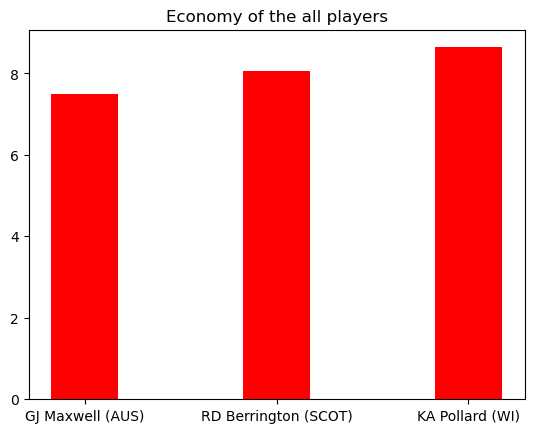

In [101]:
plt.bar(e['Player'],e['Eco'],color='Red',width=0.35)
plt.title('Economy of the all players')
plt.show()

The above plot shows the Economy of the players.`GJ Maxwell` is having good and least economy of around 7.5,`RD Berrington` have around 8 and `KA Pollard` have around 8.5 .

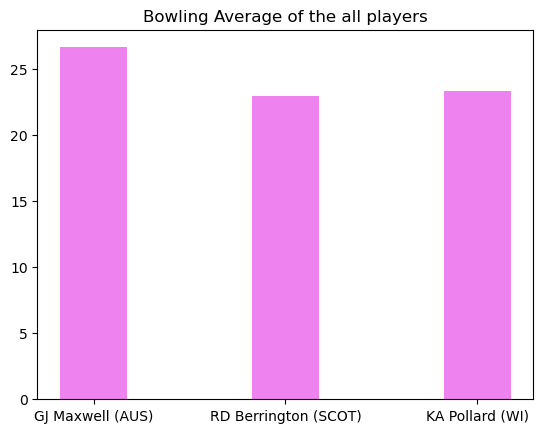

In [100]:
plt.bar(e['Player'],e['Bowl_Ave'],color='Violet',width=0.35)
plt.title('Bowling Average of the all players')
plt.show()

The above plot shows the bowling average of the players.`RD Berrington` have least Bowling average around 22,`KA Pollard` is very close to him with having average of around 23 and `GJ Maxwell` have an average around 27.

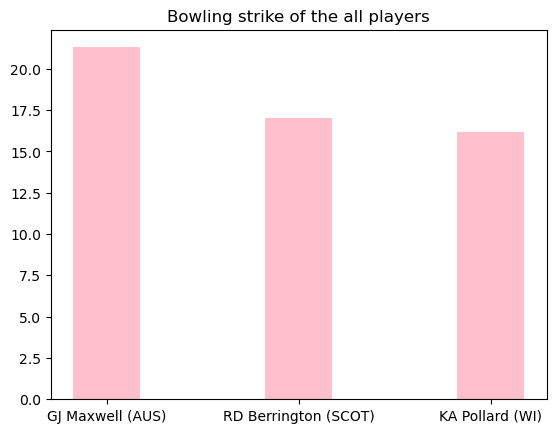

In [99]:
plt.bar(e['Player'],e['Bowl_SR'],color='Pink',width=0.35)
plt.title('Bowling strike of the all players')
plt.show()

The above plot shows the bowling strike of the players.`KA Pollard` have least bowling strike rate around 16,`RD Berrington` is very close to him with around 17 and `GJ Maxwell` have strike rate around 21.

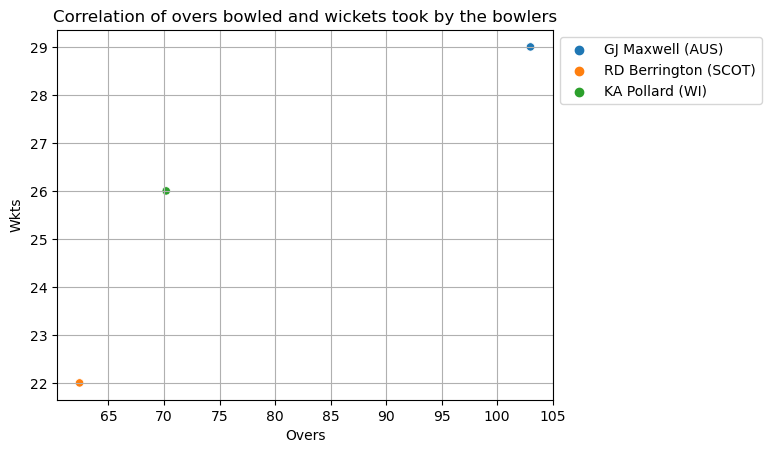

In [638]:
sns.scatterplot(x='Overs',y='Wkts',data=e,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Correlation of overs bowled and wickets took by the bowlers')
plt.grid(True)
plt.show()

The above plot shows the correlation of overs bowled by the players and wickets he took in that overs.`GJ Maxwell` bowled around 103 overs and he took 29 wickets,`RD Berrington` bowled around 63 overs and took 22 wickets and `KA Pollard` bowled 70 overs and took 26 wickets.

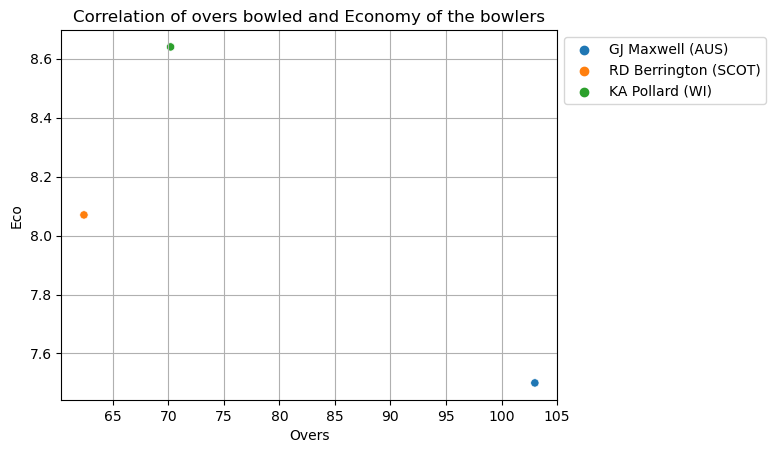

In [639]:
sns.scatterplot(x='Overs',y='Eco',data=e,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Correlation of overs bowled and Economy of the bowlers')

plt.grid(True)
plt.show()

The above plot shows the correlation of overs bowled by the players and Economy rate they have.`GJ Maxwell` bowled around 103 overs and he have economy of 7.5,`RD Berrington` bowled around 63 overs and have economy rate of 8.1 and `KA Pollard` bowled 70 overs and have economy of 8.6.

## Bowlers

In [69]:
f=Bowlers[(Bowlers['Matches']>40) & (Bowlers['Inns']>35) & (Bowlers['Ave']<25) & (Bowlers['SR']<20) & (Bowlers['Eco']<7.5)]

In [611]:
f

,Player,Matches,Inns,Overs,Wkts,Ave,Eco,SR
0,Rashid Khan (AFG/ICC),48,48,183.0,89.0,12.62,6.14,12.3
1,Shakib Al Hasan (BAN),62,61,228.5,75.0,20.88,6.84,18.3
2,SL Malinga (SL),55,54,201.5,72.0,20.80,7.41,16.8
5,GH Dockrell (IRE),70,65,203.5,64.0,23.31,7.31,19.1
7,JJ Bumrah (IND),50,49,179.1,59.0,20.25,6.66,18.2
13,KMDN Kulasekara (SL),46,46,160.2,55.0,21.03,7.21,17.4
14,MJ Santner (NZ),48,47,158.5,54.0,22.03,7.49,17.6
15,Shadab Khan (PAK),46,44,164.2,53.0,22.62,7.28,18.6
18,R Ashwin (IND),44,44,163.0,50.0,22.45,6.88,19.5
21,WB Rankin (ENG/IRE),44,43,154.0,48.0,22.02,6.86,19.2


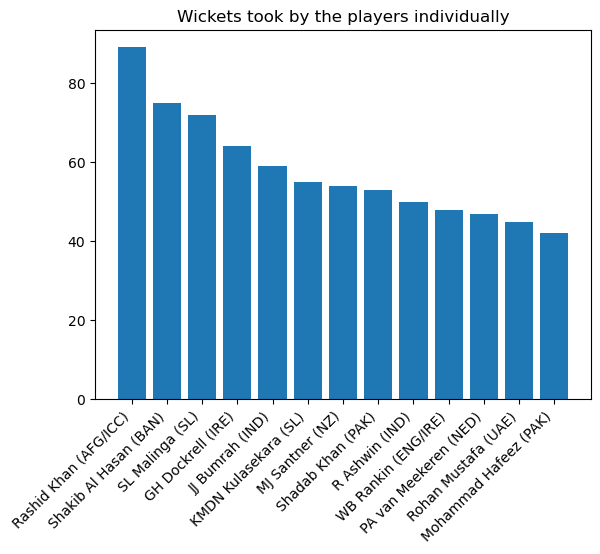

In [640]:
plt.bar(f['Player'],f['Wkts'])
plt.xticks(rotation=45,ha='right')
plt.title('Wickets took by the players individually')
plt.show()

The above bar plot shows the total wickets that an individual bowler took.`Rashid Khan` is the leading wicket taker from all by taking around 90 wickets,`Shakib Al Hasan` and `SL Malinga` are very close to him by taking around 70 wickets.

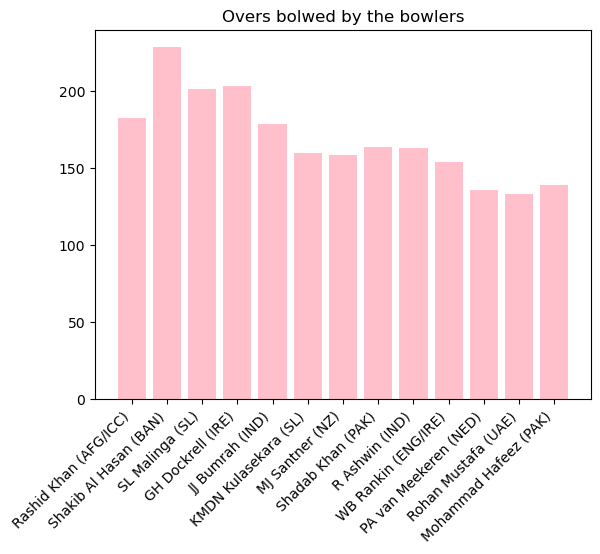

In [642]:
plt.bar(f['Player'],f['Overs'],color='Pink')
plt.xticks(rotation=45,ha='right')
plt.title('Overs bolwed by the bowlers')
plt.show()

The above plot shows that overs bowled by the players.`Shakib Al Hasan` bowled more overs around 240,`SL Malinga` and `GH Dockrell` are very close to each other by bowling around 200 overs.

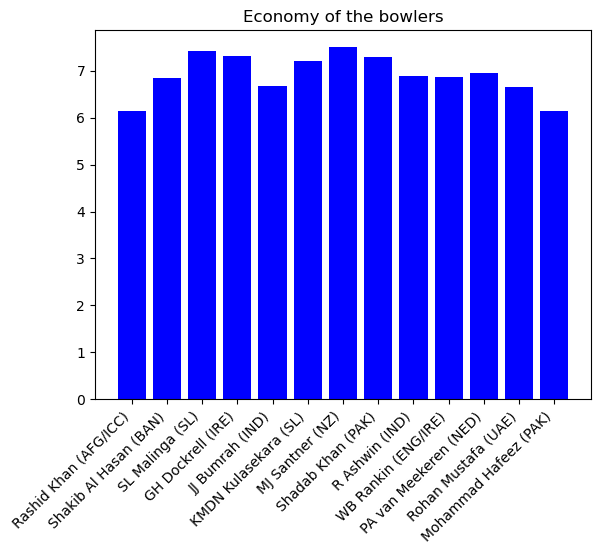

In [105]:
plt.bar(f['Player'],f['Eco'],color='Blue')
plt.xticks(rotation=45,ha='right')
plt.title('Economy of the bowlers')
plt.show()

The above plot shows the economy rate of the bowlers.`Rashid Khan` have least economy of 6.1,`J Bumrah` follows him having around 6.6,`SL Malinga` and `GH Dockrell` are very close to each other having around 7.4 of economy.

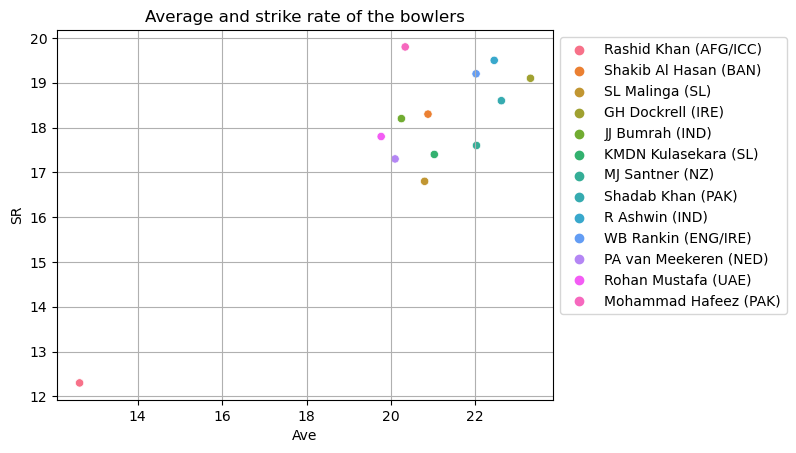

In [626]:
sns.scatterplot(data=f,x='Ave',y='SR',hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Average and strike rate of the bowlers')
plt.grid(True)

The above plot shows the average and strike rate of the bowlers.`Rashid Khan` is the one who have good average and also strike rate with around 12 and 12,and in next we have `SL Malinga` having average of around 21 and strike rate of 17 and `PA Van Meekeren` is close to him with 20 average and strike rate of 17.

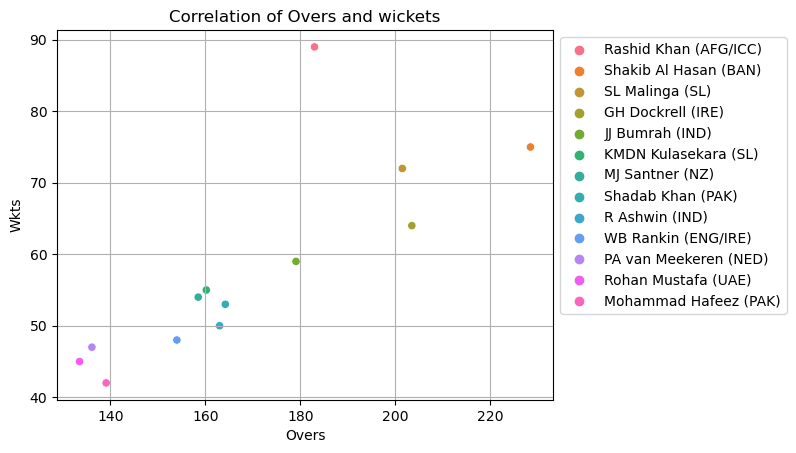

In [645]:
sns.scatterplot(x='Overs',y='Wkts',data=f,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Correlation of Overs and wickets')
plt.grid(True)
plt.show()

The above plot shows the overs bowled and wickets took by the bowlers.From the plot we can understand that `Rashid Khan` is the best bowler who took more wickets in less innings by taking around 90 wickets in 180 overs,`S Al Hasan` took around 75 wickets by bowling 230 overs and in next we have `SL Malinga` took more than 70 wickets in 200 overs. 

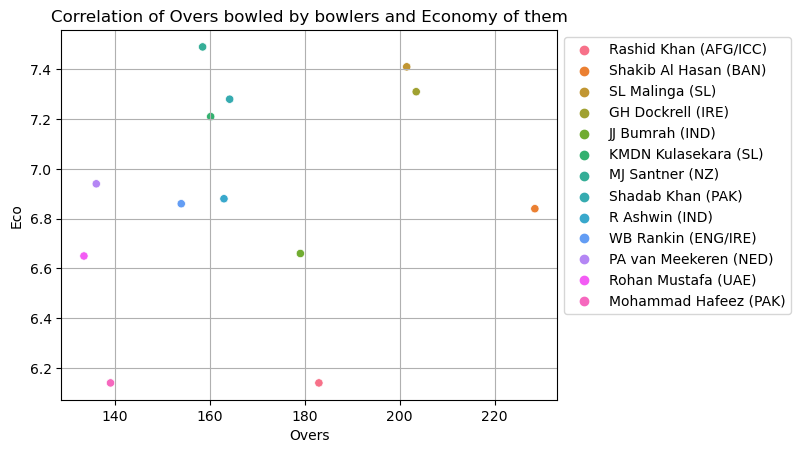

In [646]:
sns.scatterplot(x='Overs',y='Eco',data=f,hue='Player')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('Correlation of Overs bowled by bowlers and Economy of them')
plt.grid(True)
plt.show()

The above plot shows the correlation of overs bowled by the bowlers and the economy rate they have.`Rashid Khan` is the one who have least economy of 6.1 in 183 overs,`Mohammad Hafeez` is very close to him having economy of 6.1 and bowled around 140 overs,`J Bumrah` have the next least economy of 6.6 and he bowled around 180 overs and next we have `Rohan Mustafa` having economy of 6.6 and bowled around 130 overs.

## Final Playing 11

In [84]:
No1=a.iloc[[0]]['Player']
No2=a.iloc[[3]]['Player']
No3=b.iloc[[1]]['Player']
No4=b.iloc[[0]]['Player']
No5=c.iloc[[2]]['Player']
No6=e.iloc[[0]]['Player']
No7=d.iloc[[3]]['Player']
No8=e.iloc[[2]]['Player']
No9=f.iloc[[0]]['Player']
No10=f.iloc[[2]]['Player']
No11=f.iloc[[4]]['Player']

In [85]:
print(No1)
print(No2)
print(No3)
print(No4)
print(No5)
print(No6)
print(No7)
print(No8)
print(No9)
print(No10)
print(No11)

1    RG Sharma (IND)
Name: Player, dtype: object
8    C Munro (NZ)
Name: Player, dtype: object
3    AJ Finch (AUS)
Name: Player, dtype: object
0    V Kohli (IND)
Name: Player, dtype: object
2    MJ Guptill (NZ)
Name: Player, dtype: object
6    GJ Maxwell (AUS)
Name: Player, dtype: object
6    MS Dhoni (IND)
Name: Player, dtype: object
21    KA Pollard (WI)
Name: Player, dtype: object
0    Rashid Khan (AFG/ICC)
Name: Player, dtype: object
2    SL Malinga (SL)
Name: Player, dtype: object
7    JJ Bumrah (IND)
Name: Player, dtype: object


In [86]:
Players=['RG Sharma','C Munro','A Finch','V Kohli','MJ Guptil','GJ Maxwell','MS Dhoni','KA Pollard','Rashid Khan','SL Malinga','JJ Bumrah']

In [87]:
Order=[1,2,3,4,5,6,7,8,9,10,11]

In [106]:
Role=['Batsman','Batsman','Batsman','Batsman','Batsman','Bat/spin','WK/C','Bat/Seam','Bowler','Bowler','Bowler']

In [107]:
Final_playing_11=pd.DataFrame({'Position':Order,'Player':Players,'Role':Role})

In [108]:
Final_playing_11

,Position,Player,Role
0,1,RG Sharma,Batsman
1,2,C Munro,Batsman
2,3,A Finch,Batsman
3,4,V Kohli,Batsman
4,5,MJ Guptil,Batsman
5,6,GJ Maxwell,Bat/spin
6,7,MS Dhoni,WK/C
7,8,KA Pollard,Bat/Seam
8,9,Rashid Khan,Bowler
9,10,SL Malinga,Bowler
